# Setting Workspace

In [3]:
!pip install ipython-autotime
!pip install transformers

     |████████████████████████████████| 2.6 MB 15.9 MB/s 
     |████████████████████████████████| 636 kB 49.3 MB/s 
     |████████████████████████████████| 895 kB 46.5 MB/s 
     |████████████████████████████████| 3.3 MB 31.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [4]:
%load_ext autotime

time: 121 µs (started: 2021-08-16 10:50:32 +00:00)


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
time: 19.7 s (started: 2021-08-16 10:50:32 +00:00)


In [6]:
import os
os.chdir('/content/drive/My Drive/HLT/')
!pwd

/content/drive/My Drive/HLT
time: 140 ms (started: 2021-08-16 10:50:52 +00:00)


# Import Libraries

In [7]:
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
%matplotlib inline
from matplotlib.ticker import PercentFormatter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english') # listtime
nltk.download('wordnet')
import string
from wordcloud import WordCloud,STOPWORDS
from collections import Counter
from collections import defaultdict
from plotly.subplots import make_subplots
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default = 'colab'
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA, TruncatedSVD,SparsePCA
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches
from gensim.models import Word2Vec,KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
import transformers
from transformers import BertTokenizer,TFBertModel

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,r2_score,recall_score,confusion_matrix,precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold,KFold,StratifiedShuffleSplit
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,cross_val_predict
from imblearn.over_sampling import ADASYN,SMOTE
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import LSTM, Dense,Flatten,Conv2D,Conv1D,GlobalMaxPooling1D,GlobalMaxPool1D
from keras.optimizers import Adam
import numpy as np  
import pandas as pd 
import keras.backend as k
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Embedding, Concatenate, TimeDistributed, Bidirectional, GRU
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder
from keras.utils.vis_utils import plot_model

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


time: 10.5 s (started: 2021-08-16 10:50:52 +00:00)


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [8]:
pd.set_option('display.max_colwidth', -1) # show all text in col
pd.set_option('display.max_rows', None) # show all rows

time: 3.25 ms (started: 2021-08-16 10:51:02 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



# Support Functions


In [9]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

time: 76.5 ms (started: 2021-08-16 10:51:02 +00:00)


# Load the Dataset

In [10]:
train_df = pd.read_csv("datasets/train.csv") 
train_df['headline']=train_df['headline'].apply(str)
train_df.head()

,headline,is_sarcastic
0,bill de blasio thinks proved haters wrong comes pre k,0
1,baby realize white supremacist yet,1
2,spring sprung arctic way early,0
3,mayor daley son appointed head illinois nepotist party,1
4,poll grandsons talented,1


time: 586 ms (started: 2021-08-16 10:51:02 +00:00)


In [11]:
test_df = pd.read_csv("datasets/test.csv") 
test_df['headline']=test_df['headline'].apply(str)
test_df.head()

,headline,is_sarcastic
0,jessie james decker shares inspiring message post baby bodies,0
1,frustrated russian officials struggling get policies dysfunctional trump administration,1
2,second saturday staten island art walk,0
3,chris christie emits loud sob paul ryan asks crowd whether worse years ago,1
4,chicago police department monitor interactions public using new bullet cams,1


time: 543 ms (started: 2021-08-16 10:51:03 +00:00)


In [12]:
print("Train size:{}".format(train_df.shape))
print("Test size:{}".format(test_df.shape))

Train size:(22702, 2)
Test size:(4007, 2)
time: 1.87 ms (started: 2021-08-16 10:51:04 +00:00)


## Splitting the set



In [13]:
train_y = train_df['is_sarcastic']
test_y = test_df['is_sarcastic']

train_x = train_df['headline']
test_x = test_df['headline']
train_x.shape,train_y.shape,test_x.shape,test_y.shape

((22702,), (22702,), (4007,), (4007,))

time: 9.02 ms (started: 2021-08-16 10:51:04 +00:00)


# TFIDF


In [ ]:
def tfidf(train_x,test_x):
    tfidfv = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), lowercase=True, max_features=150000)
    train_df_tfidf = tfidfv.fit_transform(train_x)
    test_df_tfidf = tfidfv.transform(test_x)
    return train_df_tfidf, test_df_tfidf

time: 3.43 ms (started: 2021-08-08 09:58:37 +00:00)


In [ ]:
train_df_tfidf,test_df_tfidf = tfidf(train_x, test_x) 
train_df_tfidf.shape

(22702, 131965)

time: 911 ms (started: 2021-08-08 09:58:37 +00:00)


In [ ]:
test_df_tfidf.shape

(4007, 131965)

time: 12.8 ms (started: 2021-08-08 09:58:38 +00:00)


## Logistic Regression

In [ ]:
txt_best_grids = "grid_results/logistic_regression/best_results_lr_tfidf_v1.txt" # name of the txt file with all best results of all runned grid searches
grid_results_name = 'grid_results/logistic_regression/grid_results_lr_tfidf_v1.csv' # name of the csv file with all tests of the current grid search

time: 910 µs (started: 2021-08-08 09:58:38 +00:00)


In [ ]:
param_grid = {'penalty': ['none','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

lr = LogisticRegression()

grid = GridSearchCV(lr, param_grid, cv=StratifiedKFold(3), scoring='accuracy', verbose=1, n_jobs=-1, return_train_score=True)
grid_result = grid.fit(train_df_tfidf, train_y)


opt_df = grid_result.best_estimator_
print("{}".format(grid_result.best_params_))
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = test_y, grid.predict(test_df_tfidf)
print(classification_report(y_true, y_pred))
print()

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:   31.5s finished


{'C': 100, 'penalty': 'l2'}
Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      2248
           1       0.79      0.76      0.78      1759

    accuracy                           0.81      4007
   macro avg       0.81      0.80      0.80      4007
weighted avg       0.81      0.81      0.81      4007


time: 35.4 s (started: 2021-08-08 09:58:38 +00:00)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
lr.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

time: 7.23 ms (started: 2021-08-08 09:59:13 +00:00)


In [ ]:
# txt file with all best results of all runned grid searches
import json

grid_results_name_str = f'Results wrt: {grid_results_name} \n'
grid_params_str = f'Grid on: {json.dumps(grid_result.param_grid)} \n' 
grid_results_str = f'Best: {grid_result.best_score_} using {grid_result.best_params_} \n'

with open(txt_best_grids, "a") as file_object:
    file_object.write(grid_results_name_str)
    file_object.write(grid_params_str)
    file_object.write(grid_results_str)
    file_object.write('\n')

time: 159 ms (started: 2021-08-08 09:59:13 +00:00)


In [ ]:
print(grid_results_str)

Best: 0.7915163591902937 using {'C': 100, 'penalty': 'l2'} 

time: 1.43 ms (started: 2021-08-08 09:59:14 +00:00)


In [ ]:
grid.cv_results_

{'mean_fit_time': array([1.23441219, 0.21483064, 1.15134565, 0.26151888, 1.22113689,
        0.63487267, 1.16018327, 1.78594851, 1.14676245, 2.82968863,
        1.18897025, 2.90546695, 1.18427571, 2.52107135]),
 'mean_score_time': array([0.00275938, 0.00252541, 0.00279299, 0.00234286, 0.00255768,
        0.00259082, 0.00274396, 0.00265789, 0.0026168 , 0.00271924,
        0.00268833, 0.00245841, 0.00248114, 0.00217803]),
 'mean_test_score': array([0.78574599, 0.56105189, 0.78574599, 0.56105189, 0.78574599,
        0.63333635, 0.78574599, 0.76270834, 0.78574599, 0.79001871,
        0.78574599, 0.79151636, 0.78574599, 0.791208  ]),
 'mean_train_score': array([1.        , 0.56105189, 1.        , 0.56109594, 1.        ,
        0.65573514, 1.        , 0.94504892, 1.        , 0.99966963,
        1.        , 1.        , 1.        , 1.        ]),
 'param_C': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10, 100,
                    100, 1000, 1000],
              mask=[False

time: 17.4 ms (started: 2021-08-08 09:59:14 +00:00)


In [ ]:
# csv file with all tests of the current grid search


df = pd.DataFrame(grid.cv_results_)[['param_penalty', 'param_C',
                                     'mean_test_score', 'std_test_score', 
                                     'mean_train_score', 'std_train_score',
                                     'rank_test_score', 'mean_fit_time']].sort_values(by='rank_test_score')
df.rename(columns={'param_penalty': 'penalty',
                   'param_C': 'C',
                   'mean_test_score': 'mean_val_score',
                   'std_test_score':'std_val_score',
                   'rank_test_score': 'rank_val_score'}, inplace=True)
df.mean_train_score *= -1
df.mean_val_score *= -1
df

,penalty,C,mean_val_score,std_val_score,mean_train_score,std_train_score,rank_val_score,mean_fit_time
11,l2,100,-0.791516,0.003103,-1.000000,0.000000,1,2.905467
13,l2,1000,-0.791208,0.002809,-1.000000,0.000000,2,2.521071
9,l2,10,-0.790019,0.003460,-0.999670,0.000093,3,2.829689
0,none,0.001,-0.785746,0.003898,-1.000000,0.000000,4,1.234412
2,none,0.01,-0.785746,0.003898,-1.000000,0.000000,4,1.151346
4,none,0.1,-0.785746,0.003898,-1.000000,0.000000,4,1.221137
6,none,1,-0.785746,0.003898,-1.000000,0.000000,4,1.160183
8,none,10,-0.785746,0.003898,-1.000000,0.000000,4,1.146762
10,none,100,-0.785746,0.003898,-1.000000,0.000000,4,1.188970
12,none,1000,-0.785746,0.003898,-1.000000,0.000000,4,1.184276


time: 47.5 ms (started: 2021-08-08 09:59:14 +00:00)


In [ ]:
df.to_csv(grid_results_name)

time: 10.7 ms (started: 2021-08-08 09:59:14 +00:00)


In [ ]:
result = opt_df.score(test_df_tfidf, test_y)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 80.86%
time: 4.17 ms (started: 2021-08-08 09:59:14 +00:00)


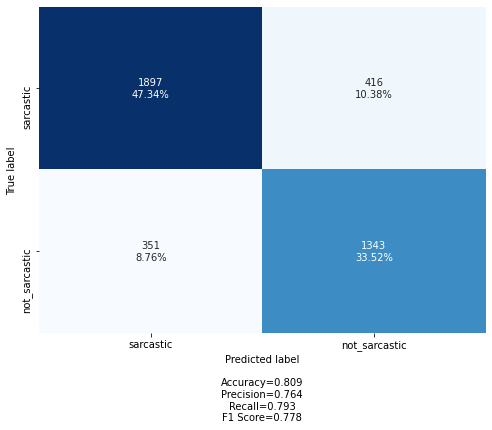

time: 147 ms (started: 2021-08-08 09:59:14 +00:00)


In [ ]:
y_pred = opt_df.predict(test_df_tfidf)
cf_matrix = confusion_matrix(y_pred, test_y)
labels = ['sarcastic','not_sarcastic']
cf_matrix
make_confusion_matrix(cf_matrix,categories=labels, figsize=(8,6), cbar=False)

In [ ]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

probs = opt_df.predict_proba(test_df_tfidf)
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(test_y, probs[:,i], pos_label=i)
    
random_probs = [0 for i in range(len(test_y))]
p_fpr, p_tpr, _ = roc_curve(test_y, random_probs, pos_label=1)

time: 14.1 ms (started: 2021-08-08 09:59:14 +00:00)


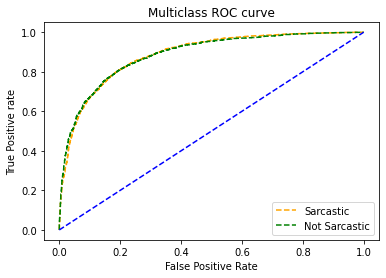

time: 213 ms (started: 2021-08-08 09:59:14 +00:00)


In [ ]:
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Sarcastic')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Not Sarcastic')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
# plt.savefig('Multiclass ROC',dpi=300)

## KNN

In [ ]:
txt_best_grids = "grid_results/knn/best_results_knn_tfidf_v1.txt" # name of the txt file with all best results of all runned grid searches
grid_results_name = 'grid_results/knn/grid_results_knn_tfidf_v1.csv' # name of the csv file with all tests of the current grid search

time: 1.1 ms (started: 2021-08-08 09:59:14 +00:00)


In [ ]:
param_grid = {'n_neighbors': list(range(1, 31, 3)),
              'weights': ['uniform', 'distance'],
             }

knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv=StratifiedKFold(3), scoring='accuracy', verbose=1, n_jobs=-1, return_train_score=True)
grid_result = grid.fit(train_df_tfidf, train_y)


opt_df = grid_result.best_estimator_
print("{}".format(grid_result.best_params_))
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = test_y, grid.predict(test_df_tfidf)
print(classification_report(y_true, y_pred))
print()

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  4.1min finished


{'n_neighbors': 25, 'weights': 'distance'}
Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.67      0.95      0.79      2248
           1       0.85      0.41      0.56      1759

    accuracy                           0.71      4007
   macro avg       0.76      0.68      0.67      4007
weighted avg       0.75      0.71      0.68      4007


time: 4min 10s (started: 2021-08-08 09:59:14 +00:00)


In [ ]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

time: 4.37 ms (started: 2021-08-08 10:03:25 +00:00)


In [ ]:
# txt file with all best results of all runned grid searches
import json

grid_results_name_str = f'Results wrt: {grid_results_name} \n'
grid_params_str = f'Grid on: {json.dumps(grid_result.param_grid)} \n' 
grid_results_str = f'Best: {grid_result.best_score_} using {grid_result.best_params_} \n'

with open(txt_best_grids, "a") as file_object:
    file_object.write(grid_results_name_str)
    file_object.write(grid_params_str)
    file_object.write(grid_results_str)
    file_object.write('\n')

time: 165 ms (started: 2021-08-08 10:03:25 +00:00)


In [ ]:
print(grid_results_str)

Best: 0.714562452800088 using {'n_neighbors': 25, 'weights': 'distance'} 

time: 1.22 ms (started: 2021-08-08 10:03:25 +00:00)


In [ ]:
grid.cv_results_

{'mean_fit_time': array([0.00879232, 0.00738335, 0.00700927, 0.00614476, 0.00648848,
        0.00618545, 0.00589387, 0.00587368, 0.00583275, 0.00605718,
        0.00598168, 0.00620723, 0.00603533, 0.00603453, 0.00593599,
        0.00615358, 0.00613252, 0.00598089, 0.00617011, 0.00595578]),
 'mean_score_time': array([2.83918571, 1.69095524, 2.88220223, 2.67074895, 3.03322085,
        2.6355691 , 2.87573322, 2.71431144, 3.0494628 , 2.61961015,
        2.89511355, 2.72416822, 3.06041439, 2.64389237, 2.90579224,
        2.74866382, 2.98362629, 2.71321726, 2.99572611, 2.6793867 ]),
 'mean_test_score': array([0.56510439, 0.56510439, 0.61474619, 0.61712486, 0.68359567,
        0.68531358, 0.67509418, 0.67694423, 0.70200835, 0.70372626,
        0.68742814, 0.68958652, 0.7074705 , 0.7093646 , 0.69755941,
        0.69954161, 0.71293264, 0.71456245, 0.7033739 , 0.70553228]),
 'mean_train_score': array([1.        , 1.        , 0.66049369, 1.        , 0.75746678,
        1.        , 0.72189713, 1. 

time: 17.2 ms (started: 2021-08-08 10:03:25 +00:00)


In [ ]:
# csv file with all tests of the current grid search

df = pd.DataFrame(grid.cv_results_)[['param_n_neighbors', 'param_weights',
                                     'mean_test_score', 'std_test_score', 
                                     'mean_train_score', 'std_train_score',
                                     'rank_test_score', 'mean_fit_time']].sort_values(by='rank_test_score')
df.rename(columns={'param_n_neighbors': 'n_neighbors',
                   'param_weights': 'weights',
                   'mean_test_score': 'mean_val_score',
                   'std_test_score':'std_val_score',
                   'rank_test_score': 'rank_val_score'}, inplace=True)
df.mean_train_score *= -1
df.mean_val_score *= -1
df

,n_neighbors,weights,mean_val_score,std_val_score,mean_train_score,std_train_score,rank_val_score,mean_fit_time
17,25,distance,-0.714562,0.005258,-1.000000,0.000000,1,0.005981
16,25,uniform,-0.712933,0.005127,-0.747732,0.009630,2,0.006133
13,19,distance,-0.709365,0.008622,-1.000000,0.000000,3,0.006035
12,19,uniform,-0.707470,0.008510,-0.749780,0.010609,4,0.006035
19,28,distance,-0.705532,0.006013,-1.000000,0.000000,5,0.005956
9,13,distance,-0.703726,0.009641,-1.000000,0.000000,6,0.006057
18,28,uniform,-0.703374,0.005394,-0.733680,0.009683,7,0.006170
8,13,uniform,-0.702008,0.009641,-0.751300,0.013401,8,0.005833
15,22,distance,-0.699542,0.006884,-1.000000,0.000000,9,0.006154
14,22,uniform,-0.697559,0.006459,-0.732138,0.010377,10,0.005936


time: 42.4 ms (started: 2021-08-08 10:03:25 +00:00)


In [ ]:
df.to_csv(grid_results_name)

time: 10.9 ms (started: 2021-08-08 10:03:25 +00:00)


In [ ]:
result = opt_df.score(test_df_tfidf, test_y)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 71.10%
time: 1.54 s (started: 2021-08-08 10:03:25 +00:00)


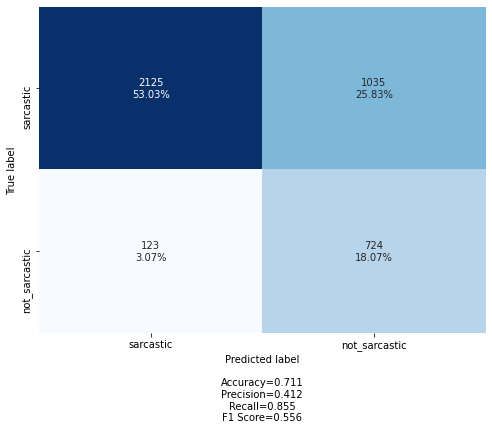

time: 1.65 s (started: 2021-08-08 10:03:27 +00:00)


In [ ]:
y_pred = opt_df.predict(test_df_tfidf)
cf_matrix = confusion_matrix(y_pred, test_y)
labels = ['sarcastic','not_sarcastic']
cf_matrix
make_confusion_matrix(cf_matrix,categories=labels, figsize=(8,6), cbar=False)

In [ ]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

probs = opt_df.predict_proba(test_df_tfidf)
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(test_y, probs[:,i], pos_label=i)
    
random_probs = [0 for i in range(len(test_y))]
p_fpr, p_tpr, _ = roc_curve(test_y, random_probs, pos_label=1)

time: 1.52 s (started: 2021-08-08 10:03:28 +00:00)


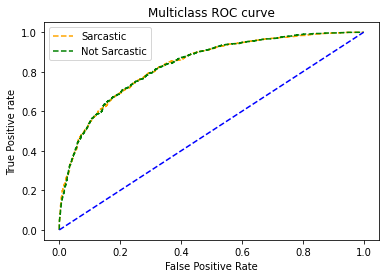

time: 210 ms (started: 2021-08-08 10:03:30 +00:00)


In [ ]:
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Sarcastic')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Not Sarcastic')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
# plt.savefig('Multiclass ROC',dpi=300)

## SVC

In [ ]:
txt_best_grids = "grid_results/svc/best_results_svm_tfidf_v1.txt" # name of the txt file with all best results of all runned grid searches
grid_results_name = 'grid_results/svc/grid_results_svm_tfidf_v1.csv' # name of the csv file with all tests of the current grid search

time: 1.5 ms (started: 2021-08-08 10:03:30 +00:00)


In [ ]:
from sklearn.svm import SVC
param_grid = {'C': [0.1, 1, 10],#, 100, 1000],
              'gamma': [0.0001, 0.001, 0.01, 0.1, 1],#, 3, 5],
              'kernel': ['rbf', 'linear','poly','sigmoid']}

svc = SVC(probability=True)

grid = GridSearchCV(svc, param_grid, cv=StratifiedKFold(3), scoring='accuracy', verbose=1, n_jobs=-1, return_train_score=True)
grid_result = grid.fit(train_df_tfidf, train_y)


opt_df = grid_result.best_estimator_
print("{}".format(grid_result.best_params_))
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = test_y, grid.predict(test_df_tfidf)
print(classification_report(y_true, y_pred))
print()

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 83.0min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 467.1min finished


{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      2248
           1       0.79      0.76      0.78      1759

    accuracy                           0.81      4007
   macro avg       0.81      0.80      0.80      4007
weighted avg       0.81      0.81      0.81      4007


time: 8h 2min 42s (started: 2021-08-08 10:03:30 +00:00)


In [ ]:
svc.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

time: 5.71 ms (started: 2021-08-08 18:06:13 +00:00)


In [ ]:
# txt file with all best results of all runned grid searches
import json

grid_results_name_str = f'Results wrt: {grid_results_name} \n'
grid_params_str = f'Grid on: {json.dumps(grid_result.param_grid)} \n' 
grid_results_str = f'Best: {grid_result.best_score_} using {grid_result.best_params_} \n'

with open(txt_best_grids, "a") as file_object:
    file_object.write(grid_results_name_str)
    file_object.write(grid_params_str)
    file_object.write(grid_results_str)
    file_object.write('\n')

time: 188 ms (started: 2021-08-08 18:06:13 +00:00)


In [ ]:
print(grid_results_str)

Best: 0.7927937719259278 using {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'} 

time: 1.4 ms (started: 2021-08-08 18:06:13 +00:00)


In [ ]:
grid.cv_results_

{'mean_fit_time': array([183.42943756, 170.29168701, 156.14685114, 158.63347578,
        188.36030539, 171.59822098, 156.9582595 , 160.6871593 ,
        209.12532194, 171.62276912, 157.34426594, 176.59877125,
        211.51022538, 172.71719909, 158.28106546, 183.09795229,
        242.49943368, 172.69639572, 384.18554711, 176.2498215 ,
        190.15974927, 334.11940916, 159.03548646, 162.16208641,
        210.32865437, 334.18470772, 159.8622814 , 177.99552155,
        212.08693687, 335.13002952, 159.63166078, 184.14776921,
        210.24430331, 335.48228319, 185.48197778, 180.39787896,
        436.68448488, 334.77005911, 471.46752294, 259.7328972 ,
        210.57610965, 516.9551154 , 160.42998807, 178.96466112,
        212.0581127 , 518.00574636, 160.65776523, 184.96120636,
        207.26911465, 517.97323076, 160.34359368, 181.56741985,
        593.87083364, 519.00485404, 304.16041382, 347.47095188,
        632.05158631, 517.43550889, 596.19808594, 560.91668741]),
 'mean_score_time': a

time: 19.2 ms (started: 2021-08-08 18:06:13 +00:00)


In [ ]:
# csv file with all tests of the current grid search

df = pd.DataFrame(grid.cv_results_)[['param_kernel', 
                                     'param_C', 'param_gamma', 
                                     'mean_test_score', 'std_test_score', 
                                     'mean_train_score', 'std_train_score',
                                     'rank_test_score', 'mean_fit_time']].sort_values(by='rank_test_score')
df.rename(columns={'param_kernel': 'kernel',
                   'param_C': 'C',
                   'param_gamma': 'gamma',
                   'mean_test_score': 'mean_val_score',
                   'std_test_score':'std_val_score',
                   'rank_test_score': 'rank_val_score'}, inplace=True)
df.mean_train_score *= -1
df.mean_val_score *= -1
df

,kernel,C,gamma,mean_val_score,std_val_score,mean_train_score,std_train_score,rank_val_score,mean_fit_time
52,rbf,10,0.1,-0.792794,0.003008,-0.999626,0.000156,1,593.870834
55,sigmoid,10,0.1,-0.792089,0.003715,-0.991432,0.000351,2,347.470952
57,linear,10,1,-0.792089,0.002907,-0.999978,0.000031,3,517.435509
53,linear,10,0.1,-0.792089,0.002907,-0.999978,0.000031,3,519.004854
49,linear,10,0.01,-0.792089,0.002907,-0.999978,0.000031,3,517.973231
45,linear,10,0.001,-0.792089,0.002907,-0.999978,0.000031,3,518.005746
41,linear,10,0.0001,-0.792089,0.002907,-0.999978,0.000031,3,516.955115
29,linear,1,0.01,-0.792001,0.003820,-0.991587,0.000307,8,335.130030
37,linear,1,1,-0.792001,0.003820,-0.991587,0.000307,8,334.770059
33,linear,1,0.1,-0.792001,0.003820,-0.991587,0.000307,8,335.482283


time: 55.9 ms (started: 2021-08-08 18:06:13 +00:00)


In [ ]:
df.to_csv(grid_results_name)

time: 9.93 ms (started: 2021-08-08 18:06:13 +00:00)


In [ ]:
result = opt_df.score(test_df_tfidf, test_y)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 80.78%
time: 7.7 s (started: 2021-08-08 18:06:13 +00:00)


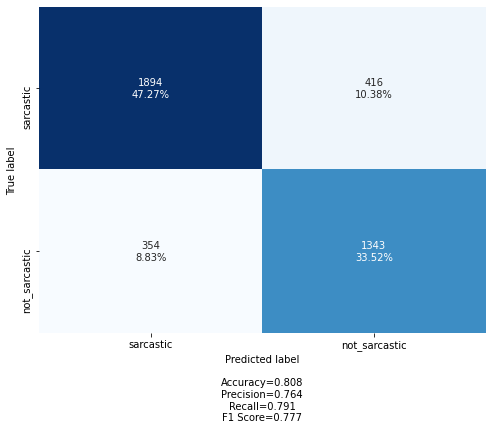

time: 7.75 s (started: 2021-08-08 18:06:21 +00:00)


In [ ]:
y_pred = opt_df.predict(test_df_tfidf)
cf_matrix = confusion_matrix(y_pred, test_y)
labels = ['sarcastic','not_sarcastic']
cf_matrix
make_confusion_matrix(cf_matrix,categories=labels, figsize=(8,6), cbar=False)

In [ ]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

probs = opt_df.predict_proba(test_df_tfidf)
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(test_y, probs[:,i], pos_label=i)
    
random_probs = [0 for i in range(len(test_y))]
p_fpr, p_tpr, _ = roc_curve(test_y, random_probs, pos_label=1)

time: 7.61 s (started: 2021-08-08 18:06:28 +00:00)


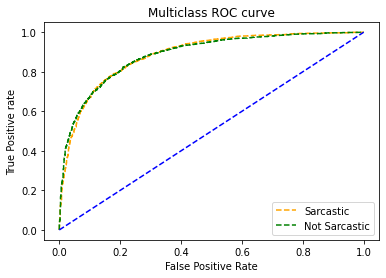

time: 205 ms (started: 2021-08-08 18:06:36 +00:00)


In [ ]:
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Sarcastic')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Not Sarcastic')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
# plt.savefig('Multiclass ROC',dpi=300)

## Multinomial Naive Bayes

In [ ]:
txt_best_grids = "grid_results/naive_bayes/best_results_naive_bayes_tfidf_v1.txt" # name of the txt file with all best results of all runned grid searches
grid_results_name = 'grid_results/naive_bayes/grid_results_naive_bayes_tfidf_v1.csv' # name of the csv file with all tests of the current grid search

time: 1.47 ms (started: 2021-08-08 18:06:36 +00:00)


In [ ]:
param_grid = {'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)} 

nb = MultinomialNB()

grid = GridSearchCV(nb, param_grid, cv=StratifiedKFold(3), scoring='accuracy', verbose=1, n_jobs=-1, return_train_score=True)
grid_result = grid.fit(train_df_tfidf, train_y)


opt_df = grid_result.best_estimator_
print("{}".format(grid_result.best_params_))
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = test_y, grid.predict(test_df_tfidf)
print(classification_report(y_true, y_pred))
print()

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'alpha': 0.1}
Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      2248
           1       0.80      0.71      0.75      1759

    accuracy                           0.79      4007
   macro avg       0.79      0.78      0.79      4007
weighted avg       0.79      0.79      0.79      4007


time: 1.68 s (started: 2021-08-08 18:06:36 +00:00)


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    1.5s finished


In [ ]:
nb.get_params().keys()

dict_keys(['alpha', 'class_prior', 'fit_prior'])

time: 4.03 ms (started: 2021-08-08 18:06:38 +00:00)


In [ ]:
# txt file with all best results of all runned grid searches
import json

grid_results_name_str = f'Results wrt: {grid_results_name} \n'
grid_params_str = f'Grid on: {json.dumps(grid_result.param_grid)} \n' 
grid_results_str = f'Best: {grid_result.best_score_} using {grid_result.best_params_} \n'

with open(txt_best_grids, "a") as file_object:
    file_object.write(grid_results_name_str)
    file_object.write(grid_params_str)
    file_object.write(grid_results_str)
    file_object.write('\n')

time: 199 ms (started: 2021-08-08 18:06:38 +00:00)


In [ ]:
print(grid_results_str)

Best: 0.7899745186831325 using {'alpha': 0.1} 

time: 1 ms (started: 2021-08-08 18:06:38 +00:00)


In [ ]:
grid.cv_results_

{'mean_fit_time': array([0.02529391, 0.02352047, 0.02461044, 0.02386745, 0.02583965,
        0.02779078]),
 'mean_score_time': array([0.007061  , 0.00692995, 0.00507061, 0.00594743, 0.00482647,
        0.00428677]),
 'mean_test_score': array([0.76204734, 0.78997452, 0.76927154, 0.76191534, 0.75975697,
        0.75878791]),
 'mean_train_score': array([0.97535458, 0.99949344, 0.99962559, 0.99962559, 0.99962559,
        0.99962559]),
 'param_alpha': masked_array(data=[1, 0.1, 0.01, 0.001, 0.0001, 1e-05],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 1},
  {'alpha': 0.1},
  {'alpha': 0.01},
  {'alpha': 0.001},
  {'alpha': 0.0001},
  {'alpha': 1e-05}],
 'rank_test_score': array([3, 1, 2, 4, 5, 6], dtype=int32),
 'split0_test_score': array([0.76334567, 0.78845137, 0.76678118, 0.75977801, 0.75713531,
        0.75568182]),
 'split0_train_score': array([0.97489097, 0.99947139, 0.99980177, 0.99980177, 0.99

time: 13.9 ms (started: 2021-08-08 18:06:38 +00:00)


In [ ]:
# csv file with all tests of the current grid search
import pandas as pd

df = pd.DataFrame(grid.cv_results_)[['param_alpha',
                                     'mean_test_score', 'std_test_score', 
                                     'mean_train_score', 'std_train_score',
                                     'rank_test_score', 'mean_fit_time']].sort_values(by='rank_test_score')
df.rename(columns={'param_alpha': 'alpha',
                   'mean_test_score': 'mean_val_score',
                   'std_test_score':'std_val_score',
                   'rank_test_score': 'rank_val_score'}, inplace=True)
df.mean_train_score *= -1
df.mean_val_score *= -1
df

,alpha,mean_val_score,std_val_score,mean_train_score,std_train_score,rank_val_score,mean_fit_time
1,0.1,-0.789975,0.001141,-0.999493,0.000031,1,0.023520
2,0.01,-0.769272,0.002218,-0.999626,0.000136,2,0.024610
0,1,-0.762047,0.001544,-0.975355,0.000378,3,0.025294
3,0.001,-0.761915,0.001587,-0.999626,0.000136,4,0.023867
4,0.0001,-0.759757,0.002045,-0.999626,0.000136,5,0.025840
5,1e-05,-0.758788,0.002471,-0.999626,0.000136,6,0.027791


time: 35.8 ms (started: 2021-08-08 18:06:38 +00:00)


In [ ]:
df.to_csv(grid_results_name)

time: 19.9 ms (started: 2021-08-08 18:06:38 +00:00)


In [ ]:
result = opt_df.score(test_df_tfidf, test_y)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 79.24%
time: 10.6 ms (started: 2021-08-08 18:06:38 +00:00)


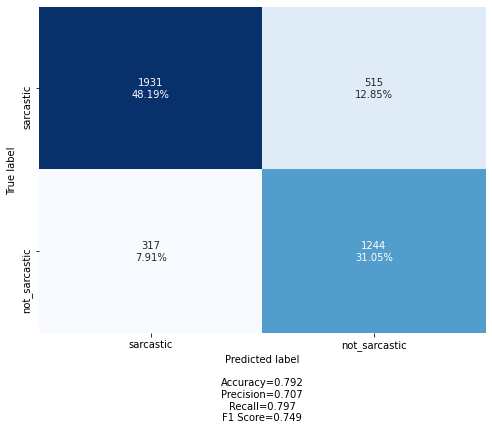

time: 126 ms (started: 2021-08-08 18:06:38 +00:00)


In [ ]:
y_pred = opt_df.predict(test_df_tfidf)
cf_matrix = confusion_matrix(y_pred, test_y)
labels = ['sarcastic','not_sarcastic']
cf_matrix
make_confusion_matrix(cf_matrix,categories=labels, figsize=(8,6), cbar=False)

In [ ]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

probs = opt_df.predict_proba(test_df_tfidf)
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(test_y, probs[:,i], pos_label=i)
    
random_probs = [0 for i in range(len(test_y))]
p_fpr, p_tpr, _ = roc_curve(test_y, random_probs, pos_label=1)

time: 14 ms (started: 2021-08-08 18:06:38 +00:00)


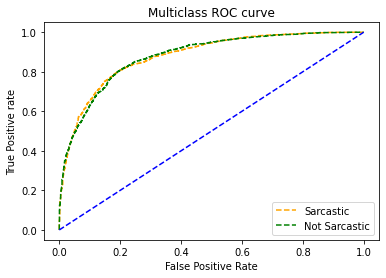

time: 215 ms (started: 2021-08-08 18:06:38 +00:00)


In [ ]:
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Sarcastic')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Not Sarcastic')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
# plt.savefig('Multiclass ROC',dpi=300)

## Decision Tree

In [ ]:
txt_best_grids = "grid_results/decision_tree/best_results_decision_tree_tfidf_v1.txt" # name of the txt file with all best results of all runned grid searches
grid_results_name = 'grid_results/decision_tree/grid_results_decision_tree_tfidf_v1.csv' # name of the csv file with all tests of the current grid search

time: 1.72 ms (started: 2021-08-08 18:06:39 +00:00)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [2, 5, 10, 15, None],
              'min_samples_split': [2, 5, 10, 20],
              'min_samples_leaf': [1, 5, 10, 20]}

dt = DecisionTreeClassifier(splitter="best")

grid = GridSearchCV(dt, param_grid, cv=StratifiedKFold(3), scoring='accuracy', verbose=1, n_jobs=-1, return_train_score=True)
grid_result = grid.fit(train_df_tfidf, train_y)


opt_df = grid_result.best_estimator_
print("{}".format(grid_result.best_params_))
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = test_y, grid.predict(test_df_tfidf)
print(classification_report(y_true, y_pred))
print()

Fitting 3 folds for each of 160 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 23.5min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 27.7min finished


{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.72      0.80      0.76      2248
           1       0.70      0.61      0.65      1759

    accuracy                           0.71      4007
   macro avg       0.71      0.70      0.70      4007
weighted avg       0.71      0.71      0.71      4007


time: 28min 20s (started: 2021-08-08 18:06:39 +00:00)


In [ ]:
dt.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

time: 7.75 ms (started: 2021-08-08 18:34:59 +00:00)


In [ ]:
# txt file with all best results of all runned grid searches
import json

grid_results_name_str = f'Results wrt: {grid_results_name} \n'
grid_params_str = f'Grid on: {json.dumps(grid_result.param_grid)} \n' 
grid_results_str = f'Best: {grid_result.best_score_} using {grid_result.best_params_} \n'

with open(txt_best_grids, "a") as file_object:
    file_object.write(grid_results_name_str)
    file_object.write(grid_params_str)
    file_object.write(grid_results_str)
    file_object.write('\n')

time: 199 ms (started: 2021-08-08 18:34:59 +00:00)


In [ ]:
print(grid_results_str)

Best: 0.7220510631219922 using {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10} 

time: 787 µs (started: 2021-08-08 18:34:59 +00:00)


In [ ]:
grid.cv_results_

{'mean_fit_time': array([ 3.23628974,  3.21345115,  3.17739391,  3.16681369,  3.1627442 ,
         3.15910141,  3.15743335,  3.15412752,  3.15567485,  3.1499997 ,
         3.15093915,  3.147463  ,  3.14447347,  3.14649812,  3.14729961,
         3.14445003,  3.39297183,  3.40436745,  3.39882231,  3.39700182,
         3.36306318,  3.35670328,  3.35057894,  3.35411827,  3.33130964,
         3.34814   ,  3.33173378,  3.3449742 ,  3.32517576,  3.32742469,
         3.32640584,  3.34720914,  3.85416738,  3.85574269,  3.86942991,
         3.83668232,  3.83921599,  3.84767262,  3.85649832,  3.80078975,
         3.84540478,  3.84838589,  3.84317454,  3.84937771,  3.76589251,
         3.77655156,  3.75868448,  3.76791437,  4.40750051,  4.36129212,
         4.34921757,  4.34326371,  4.40092182,  4.40547363,  4.37786349,
         4.27247524,  4.32033165,  4.30360357,  4.29236444,  4.30352974,
         4.06379493,  4.07485652,  4.07317623,  4.08529766, 34.59811052,
        33.48684637, 31.81176917, 

time: 48.9 ms (started: 2021-08-08 18:34:59 +00:00)


In [ ]:
# csv file with all tests of the current grid search

df = pd.DataFrame(grid.cv_results_)[['param_criterion', 'param_min_samples_leaf',
                                     'param_max_depth', 'param_min_samples_split',
                                     'mean_test_score', 'std_test_score', 
                                     'mean_train_score', 'std_train_score',
                                     'rank_test_score', 'mean_fit_time']].sort_values(by='rank_test_score')
df.rename(columns={'param_criterion': 'criterion',
                   'param_min_samples_leaf': 'min_samples_leaf',
                   'param_min_samples_split': 'min_samples_split',
                   'param_max_depth': 'max_depth', 
                   'mean_test_score': 'mean_val_score',
                   'std_test_score':'std_val_score',
                   'rank_test_score': 'rank_val_score'}, inplace=True)
df.mean_train_score *= -1
df.mean_val_score *= -1
df

,criterion,min_samples_leaf,max_depth,min_samples_split,mean_val_score,std_val_score,mean_train_score,std_train_score,rank_val_score,mean_fit_time
146,entropy,1,None,10,-0.722051,0.004415,-0.975002,0.001460,1,37.843919
145,entropy,1,None,5,-0.721126,0.004347,-0.991829,0.000736,2,39.240374
144,entropy,1,None,2,-0.718968,0.002570,-1.000000,0.000000,3,40.105651
147,entropy,1,None,20,-0.718703,0.002563,-0.953815,0.000570,4,36.350650
64,gini,1,None,2,-0.716677,0.004256,-1.000000,0.000000,5,34.598111
65,gini,1,None,5,-0.715620,0.004748,-0.990926,0.000439,6,33.486846
67,gini,1,None,20,-0.713726,0.003112,-0.947560,0.002776,7,30.198708
66,gini,1,None,10,-0.713461,0.002831,-0.969849,0.001541,8,31.811769
151,entropy,5,None,20,-0.710290,0.003957,-0.853757,0.002581,9,20.696557
149,entropy,5,None,5,-0.709012,0.002200,-0.858801,0.002886,10,22.680259


time: 87.4 ms (started: 2021-08-08 18:34:59 +00:00)


In [ ]:
df.to_csv(grid_results_name)

time: 21 ms (started: 2021-08-08 18:34:59 +00:00)


In [ ]:
result = opt_df.score(test_df_tfidf, test_y)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 71.43%
time: 11.8 ms (started: 2021-08-08 18:35:00 +00:00)


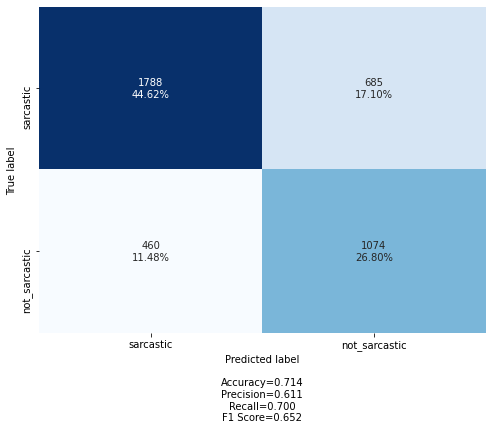

time: 141 ms (started: 2021-08-08 18:35:00 +00:00)


In [ ]:
y_pred = opt_df.predict(test_df_tfidf)
cf_matrix = confusion_matrix(y_pred, test_y)
labels = ['sarcastic','not_sarcastic']
cf_matrix
make_confusion_matrix(cf_matrix,categories=labels, figsize=(8,6), cbar=False)

In [ ]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

probs = opt_df.predict_proba(test_df_tfidf)
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(test_y, probs[:,i], pos_label=i)
    
random_probs = [0 for i in range(len(test_y))]
p_fpr, p_tpr, _ = roc_curve(test_y, random_probs, pos_label=1)

time: 17.9 ms (started: 2021-08-08 18:35:00 +00:00)


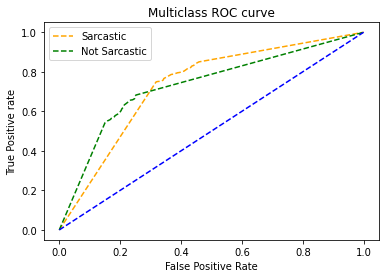

time: 196 ms (started: 2021-08-08 18:35:00 +00:00)


In [ ]:
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Sarcastic')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Not Sarcastic')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
# plt.savefig('Multiclass ROC',dpi=300)

## Random Forest

In [ ]:
txt_best_grids = "grid_results/random_forest/best_results_random_forest_tfidf_v1.txt" # name of the txt file with all best results of all runned grid searches
grid_results_name = 'grid_results/random_forest/grid_results_random_forest_tfidf_v1.csv' # name of the csv file with all tests of the current grid search

time: 1.29 ms (started: 2021-08-08 18:35:00 +00:00)


In [ ]:
param_grid = {
    "n_estimators": [25, 50, 100],
    "max_depth" : [2,3,5,10, None],
    "criterion" : ["gini", "entropy"],
    "bootstrap" : [True, False]
    }

rf = RandomForestClassifier()

grid = GridSearchCV(rf, param_grid, cv=StratifiedKFold(3), scoring='accuracy', verbose=1, n_jobs=-1, return_train_score=True)
grid_result = grid.fit(train_df_tfidf, train_y)


opt_df = grid_result.best_estimator_
print("{}".format(grid_result.best_params_))
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = test_y, grid.predict(test_df_tfidf)
print(classification_report(y_true, y_pred))
print()

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 82.4min finished


{'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'n_estimators': 100}
Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.74      0.88      0.80      2248
           1       0.79      0.60      0.68      1759

    accuracy                           0.75      4007
   macro avg       0.76      0.74      0.74      4007
weighted avg       0.76      0.75      0.75      4007


time: 1h 24min 51s (started: 2021-08-08 18:35:00 +00:00)


In [ ]:
rf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

time: 6.44 ms (started: 2021-08-08 19:59:51 +00:00)


In [ ]:
# txt file with all best results of all runned grid searches
import json

grid_results_name_str = f'Results wrt: {grid_results_name} \n'
grid_params_str = f'Grid on: {json.dumps(grid_result.param_grid)} \n' 
grid_results_str = f'Best: {grid_result.best_score_} using {grid_result.best_params_} \n'

with open(txt_best_grids, "a") as file_object:
    file_object.write(grid_results_name_str)
    file_object.write(grid_params_str)
    file_object.write(grid_results_str)
    file_object.write('\n')

time: 173 ms (started: 2021-08-08 19:59:51 +00:00)


In [ ]:
print(grid_results_str)

Best: 0.7651749317559936 using {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'n_estimators': 100} 

time: 2.78 ms (started: 2021-08-08 19:59:51 +00:00)


In [ ]:
grid.cv_results_

{'mean_fit_time': array([4.46193933e-01, 8.53499889e-01, 1.65401832e+00, 5.78348716e-01,
        1.13932196e+00, 2.24639161e+00, 8.79545848e-01, 1.77804081e+00,
        3.53605111e+00, 1.72423593e+00, 3.42379983e+00, 6.85044257e+00,
        8.31113019e+01, 1.64604788e+02, 3.30439491e+02, 4.26457802e-01,
        8.32420667e-01, 1.64926386e+00, 5.71186304e-01, 1.14563274e+00,
        2.28344011e+00, 8.90840371e-01, 1.77636735e+00, 3.60297306e+00,
        1.75594664e+00, 3.53298084e+00, 7.00204078e+00, 8.04572652e+01,
        1.61555150e+02, 3.22169810e+02, 5.63899120e-01, 1.09844001e+00,
        2.21890704e+00, 7.97481457e-01, 1.59463382e+00, 3.19841194e+00,
        1.29598475e+00, 2.57557416e+00, 5.17941610e+00, 2.60010362e+00,
        5.17426515e+00, 1.03844569e+01, 1.38371996e+02, 2.76293852e+02,
        5.57826681e+02, 5.72912852e-01, 1.12602774e+00, 2.24520628e+00,
        8.02138011e-01, 1.61694392e+00, 3.23310288e+00, 1.32320046e+00,
        2.61529501e+00, 5.21239869e+00, 2.62125

time: 27.1 ms (started: 2021-08-08 19:59:51 +00:00)


In [ ]:
# csv file with all tests of the current grid search

df = pd.DataFrame(grid.cv_results_)[['param_criterion', 'param_n_estimators',
                                     'param_max_depth', 'param_bootstrap',
                                     'mean_test_score', 'std_test_score', 
                                     'mean_train_score', 'std_train_score',
                                     'rank_test_score', 'mean_fit_time']].sort_values(by='rank_test_score')
df.rename(columns={'param_criterion': 'criterion',
                   'param_n_estimators': 'n_estimators',
                   'param_bootstrap': 'bootstrap',
                   'param_max_depth': 'max_depth', 
                   'mean_test_score': 'mean_val_score',
                   'std_test_score':'std_val_score',
                   'rank_test_score': 'rank_val_score'}, inplace=True)
df.mean_train_score *= -1
df.mean_val_score *= -1
df

,criterion,n_estimators,max_depth,bootstrap,mean_val_score,std_val_score,mean_train_score,std_train_score,rank_val_score,mean_fit_time
59,entropy,100,None,False,-0.765175,0.001502,-1.000000,0.000000e+00,1,514.355169
58,entropy,50,None,False,-0.763589,0.001811,-1.000000,0.000000e+00,2,280.346636
44,gini,100,None,False,-0.760109,0.002636,-1.000000,0.000000e+00,3,557.826681
57,entropy,25,None,False,-0.759977,0.002138,-1.000000,0.000000e+00,4,139.111789
43,gini,50,None,False,-0.758171,0.002858,-1.000000,0.000000e+00,5,276.293852
42,gini,25,None,False,-0.755396,0.000722,-1.000000,0.000000e+00,6,138.371996
29,entropy,100,None,True,-0.753678,0.003101,-1.000000,0.000000e+00,7,322.169810
28,entropy,50,None,True,-0.750066,0.002477,-0.999383,3.113739e-05,8,161.555150
14,gini,100,None,True,-0.748612,0.002154,-0.999934,2.058058e-09,9,330.439491
27,entropy,25,None,True,-0.747467,0.004929,-0.997467,3.975933e-04,10,80.457265


time: 53.8 ms (started: 2021-08-08 19:59:51 +00:00)


In [ ]:
df.to_csv(grid_results_name)

time: 12.7 ms (started: 2021-08-08 19:59:52 +00:00)


In [ ]:
result = opt_df.score(test_df_tfidf, test_y)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 75.49%
time: 1.06 s (started: 2021-08-08 19:59:52 +00:00)


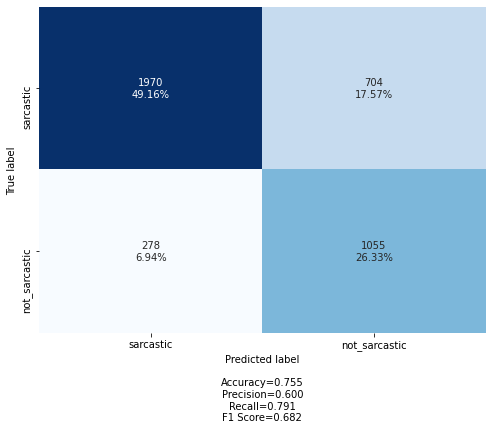

time: 1.17 s (started: 2021-08-08 19:59:53 +00:00)


In [ ]:
y_pred = opt_df.predict(test_df_tfidf)
cf_matrix = confusion_matrix(y_pred, test_y)
labels = ['sarcastic','not_sarcastic']
cf_matrix
make_confusion_matrix(cf_matrix,categories=labels, figsize=(8,6), cbar=False)

In [ ]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

probs = opt_df.predict_proba(test_df_tfidf)
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(test_y, probs[:,i], pos_label=i)
    
random_probs = [0 for i in range(len(test_y))]
p_fpr, p_tpr, _ = roc_curve(test_y, random_probs, pos_label=1)

time: 1.05 s (started: 2021-08-08 19:59:54 +00:00)


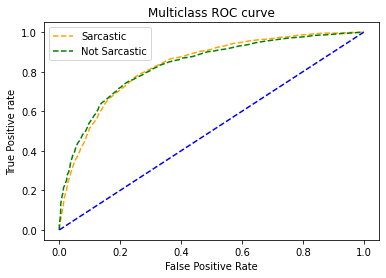

time: 209 ms (started: 2021-08-08 19:59:55 +00:00)


In [ ]:
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Sarcastic')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Not Sarcastic')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
# plt.savefig('Multiclass ROC',dpi=300)

# Static Semantic Embedding on Statistical Models

## Word2Vec

In [ ]:
check_df=list(train_x.str.split())

model = Word2Vec(check_df, window=2, # model=Word2Vec(check_df,min_count=1,iter=20)
                 min_count=0,
                 size=500,
                 sample=6e-5, 
                 alpha=0.03, 
                 min_alpha=0.0007, 
                 negative=20)

time: 10.8 s (started: 2021-08-08 19:59:55 +00:00)


In [ ]:
check_df[0]

['bill',
 'de',
 'blasio',
 'thinks',
 'proved',
 'haters',
 'wrong',
 'comes',
 'pre',
 'k']

time: 7.5 ms (started: 2021-08-08 20:00:06 +00:00)


In [ ]:
words = list(model.wv.vocab)
print(words)

['bill', 'de', 'blasio', 'thinks', 'proved', 'haters', 'wrong', 'comes', 'pre', 'k', 'baby', 'realize', 'white', 'supremacist', 'yet', 'spring', 'sprung', 'arctic', 'way', 'early', 'mayor', 'daley', 'son', 'appointed', 'head', 'illinois', 'nepotist', 'party', 'poll', 'grandsons', 'talented', 'britain', 'grants', 'refugee', 'status', 'ex', 'president', 'maldives', 'lawyer', 'says', 'house', 'insists', 'trump', 'considering', 'firing', 'mueller', 'every', 'glass', 'grandmother', 'cupboard', 'visibly', 'filthy', 'adorable', 'tiger', 'cubs', 'turn', 'fearsome', 'big', 'cats', 'course', 'year', 'assisted', 'care', 'facility', 'hits', 'grand', 'fucking', 'slam', 'little', 'styrofoam', 'cups', 'sherbet', 'purged', 'percent', 'closet', 'feel', 'guilty', 'police', 'homicide', 'investigation', 'uncovers', 'cap', 'ass', 'dallas', 'shootings', 'cast', 'shadow', 'obama', 'trip', 'spain', 'peshawar', 'tragedy', 'shows', 'pakistan', 'needs', 'new', 'religious', 'narrative', 'turkey', 'sacks', 'judges

In [ ]:
len(words)

23001

time: 3.53 ms (started: 2021-08-08 20:00:06 +00:00)


In [ ]:
print(model['bill'])

[-0.03172098 -0.04707664  0.048781   -0.1731696  -0.05443161 -0.00332355
  0.04278577 -0.17293106  0.15548338 -0.17978917  0.18231274  0.03642958
 -0.02540016  0.0848875  -0.2694262  -0.01897675  0.10244872 -0.00416831
 -0.0132804  -0.02466216 -0.08413672 -0.10058326 -0.05434921 -0.02259173
 -0.06556655 -0.05272167 -0.12092496  0.36763564 -0.22461312 -0.09368336
  0.15160854 -0.02778971  0.11698597 -0.23467626  0.15691397 -0.03741131
  0.22052066  0.09471949 -0.00677838 -0.20444112  0.16497019 -0.028315
  0.06493309  0.03524096  0.27941814  0.10314614 -0.21717364 -0.07009096
  0.4922784  -0.2096808  -0.06143197  0.05416424 -0.05254725  0.16503677
  0.23267405 -0.18555139  0.42579055 -0.10006554  0.05534049  0.09901136
  0.05803319  0.19679007 -0.02841461  0.06755271 -0.00627137 -0.28079182
 -0.15520021 -0.17591467 -0.09366312  0.03386399  0.02873992  0.05226181
  0.18486129 -0.1449337   0.31833133 -0.12399056 -0.19396962 -0.11931142
  0.027968   -0.10811651  0.04908732  0.10988583 -0.1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



In [ ]:
# model.wv.save_word2vec_format('Embeddings/sarcasm_classifier/w2v.bin')

time: 674 µs (started: 2021-08-08 20:00:06 +00:00)


In [ ]:
# save the modeled words produced from Word2Vec
model.save('Embeddings/Sarcasm/w2v.bin')

time: 4.36 s (started: 2021-08-08 20:00:06 +00:00)


In [ ]:
model = Word2Vec.load('Embeddings/Sarcasm/w2v.bin')
# loaded_model=KeyedVectors.load('Embeddings/Sarcasm/w2v.bin')
print(model)

Word2Vec(vocab=23001, size=500, alpha=0.03)
time: 450 ms (started: 2021-08-08 20:00:10 +00:00)


In [ ]:
# Creating Sentence Vectors from Word2Vec

def convert_sentence(data):
    vocab=[w for w in data if w in model.wv.vocab]
    avg_pool=np.mean(model[vocab],axis=0)
#     sum_pool=np.sum(model[vocab],axis=0)
#     min_pool=np.min(model[vocab],axis=0)
#     max_pool=np.max(model[vocab],axis=0)
    return avg_pool

time: 4.6 ms (started: 2021-08-08 20:00:11 +00:00)


In [ ]:
train_x_vectorized=train_x.apply(convert_sentence)
train_x_vectorized.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



(22702,)

time: 2.11 s (started: 2021-08-08 20:00:11 +00:00)


In [ ]:
test_x_vectorized=test_x.apply(convert_sentence)
test_x_vectorized.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



(4007,)

time: 379 ms (started: 2021-08-08 20:00:13 +00:00)


In [ ]:
'''
This is done to ensure the dimensionality of the input sentence vectors is that of an array (list).
This can be easily fed into any statistical classifier for our use case.
'''
train_x_vectorized_list=list(train_x_vectorized)
test_x_vectorized_list=list(test_x_vectorized)

time: 7.81 ms (started: 2021-08-08 20:00:13 +00:00)


### Logistic Regression

In [ ]:
txt_best_grids = "grid_results/logistic_regression/best_results_lr_w2v_v1.txt" # name of the txt file with all best results of all runned grid searches
grid_results_name = 'grid_results/logistic_regression/grid_results_lr_w2v_v1.csv' # name of the csv file with all tests of the current grid search

time: 1.59 ms (started: 2021-08-08 20:00:13 +00:00)


In [ ]:
param_grid = {'penalty': ['none','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

lr = LogisticRegression()

grid = GridSearchCV(lr, param_grid, cv=StratifiedKFold(3), scoring='accuracy', verbose=1, n_jobs=-1, return_train_score=True)
grid_result = grid.fit(train_x_vectorized_list, train_y)


opt_df = grid_result.best_estimator_
print("{}".format(grid_result.best_params_))
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = test_y, grid.predict(test_x_vectorized_list)
print(classification_report(y_true, y_pred))
print()

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:  1.0min finished


{'C': 0.001, 'penalty': 'l2'}
Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.56      1.00      0.72      2248
           1       0.00      0.00      0.00      1759

    accuracy                           0.56      4007
   macro avg       0.28      0.50      0.36      4007
weighted avg       0.31      0.56      0.40      4007


time: 1min 2s (started: 2021-08-08 20:00:13 +00:00)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
lr.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

time: 8.44 ms (started: 2021-08-08 20:01:15 +00:00)


In [ ]:
# txt file with all best results of all runned grid searches
import json

grid_results_name_str = f'Results wrt: {grid_results_name} \n'
grid_params_str = f'Grid on: {json.dumps(grid_result.param_grid)} \n' 
grid_results_str = f'Best: {grid_result.best_score_} using {grid_result.best_params_} \n'

with open(txt_best_grids, "a") as file_object:
    file_object.write(grid_results_name_str)
    file_object.write(grid_params_str)
    file_object.write(grid_results_str)
    file_object.write('\n')

time: 20.8 ms (started: 2021-08-08 20:01:15 +00:00)


In [ ]:
print(grid_results_str)

Best: 0.5610518899382569 using {'C': 0.001, 'penalty': 'l2'} 

time: 1.01 ms (started: 2021-08-08 20:01:15 +00:00)


In [ ]:
grid.cv_results_

{'mean_fit_time': array([0.47677835, 0.253673  , 0.44642576, 0.32293288, 0.45020334,
        0.36339704, 0.44289827, 0.25598399, 0.44331098, 0.30981874,
        0.44710843, 0.34521651, 0.44198783, 0.61123975]),
 'mean_score_time': array([0.03160572, 0.02810216, 0.0263985 , 0.02374689, 0.02605025,
        0.02562054, 0.02641217, 0.025858  , 0.0256544 , 0.02378956,
        0.02709174, 0.02992574, 0.02667069, 0.02365828]),
 'mean_test_score': array([0.55616263, 0.56105189, 0.55616263, 0.56105189, 0.55616263,
        0.56105189, 0.55616263, 0.56105189, 0.55616263, 0.56105189,
        0.55616263, 0.56100784, 0.55616263, 0.55867336]),
 'mean_train_score': array([0.55761605, 0.56105189, 0.55761605, 0.56105189, 0.55761605,
        0.56105189, 0.55761605, 0.56105189, 0.55761605, 0.56105189,
        0.55761605, 0.56102987, 0.55761605, 0.55966433]),
 'param_C': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10, 100,
                    100, 1000, 1000],
              mask=[False

time: 25.6 ms (started: 2021-08-08 20:01:15 +00:00)


In [ ]:
# csv file with all tests of the current grid search

df = pd.DataFrame(grid.cv_results_)[['param_penalty', 'param_C',
                                     'mean_test_score', 'std_test_score', 
                                     'mean_train_score', 'std_train_score',
                                     'rank_test_score', 'mean_fit_time']].sort_values(by='rank_test_score')
df.rename(columns={'param_penalty': 'penalty',
                   'param_C': 'C',
                   'mean_test_score': 'mean_val_score',
                   'std_test_score':'std_val_score',
                   'rank_test_score': 'rank_val_score'}, inplace=True)
df.mean_train_score *= -1
df.mean_val_score *= -1
df

,penalty,C,mean_val_score,std_val_score,mean_train_score,std_train_score,rank_val_score,mean_fit_time
1,l2,0.001,-0.561052,0.000054,-0.561052,0.000027,1,0.253673
3,l2,0.01,-0.561052,0.000054,-0.561052,0.000027,1,0.322933
5,l2,0.1,-0.561052,0.000054,-0.561052,0.000027,1,0.363397
7,l2,1,-0.561052,0.000054,-0.561052,0.000027,1,0.255984
9,l2,10,-0.561052,0.000054,-0.561052,0.000027,1,0.309819
11,l2,100,-0.561008,0.000027,-0.561030,0.000057,6,0.345217
13,l2,1000,-0.558673,0.002040,-0.559664,0.001004,7,0.611240
0,none,0.001,-0.556163,0.003680,-0.557616,0.002526,8,0.476778
2,none,0.01,-0.556163,0.003680,-0.557616,0.002526,8,0.446426
4,none,0.1,-0.556163,0.003680,-0.557616,0.002526,8,0.450203


time: 34.2 ms (started: 2021-08-08 20:01:15 +00:00)


In [ ]:
df.to_csv(grid_results_name)

time: 13.8 ms (started: 2021-08-08 20:01:16 +00:00)


In [ ]:
result = opt_df.score(test_x_vectorized_list, test_y)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 56.10%
time: 24.7 ms (started: 2021-08-08 20:01:16 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: RuntimeWarning:

invalid value encountered in long_scalars



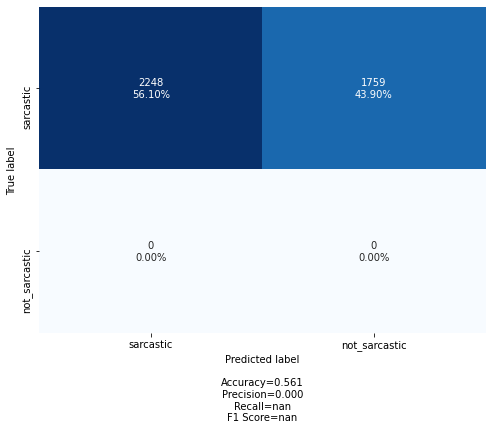

time: 210 ms (started: 2021-08-08 20:01:16 +00:00)


In [ ]:
y_pred = opt_df.predict(test_x_vectorized_list)
cf_matrix = confusion_matrix(y_pred, test_y)
labels = ['sarcastic','not_sarcastic']
cf_matrix
make_confusion_matrix(cf_matrix,categories=labels, figsize=(8,6), cbar=False)

In [ ]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

probs = opt_df.predict_proba(test_x_vectorized_list)
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(test_y, probs[:,i], pos_label=i)
    
random_probs = [0 for i in range(len(test_y))]
p_fpr, p_tpr, _ = roc_curve(test_y, random_probs, pos_label=1)

time: 28 ms (started: 2021-08-08 20:01:16 +00:00)


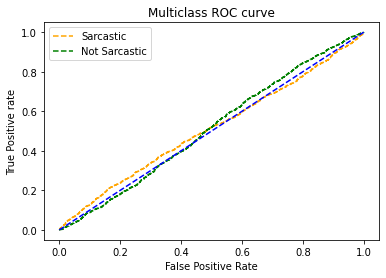

time: 256 ms (started: 2021-08-08 20:01:16 +00:00)


In [ ]:
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Sarcastic')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Not Sarcastic')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
# plt.savefig('Multiclass ROC',dpi=300)

In [ ]:
#Applying Logistic Regression on split tfidf baseline
model=LogisticRegression()
model.fit(train_x_vectorized_list,train_y)
pred=model.predict(test_x_vectorized_list)
print("Evaluate confusion matrix for LR")
print(confusion_matrix(test_y,pred))
print(f"Accuracy Score for LR with C=1.0  ={accuracy_score(test_y,pred)}")

Evaluate confusion matrix for LR
[[2248    0]
 [1759    0]]
Accuracy Score for LR with C=1.0  =0.561018218118293
time: 431 ms (started: 2021-08-08 20:01:16 +00:00)


### KNN

In [ ]:
txt_best_grids = "grid_results/knn/best_results_knn_w2v.txt" # name of the txt file with all best results of all runned grid searches
grid_results_name = 'grid_results/knn/grid_results_knn_w2v_v1.csv' # name of the csv file with all tests of the current grid search

time: 1.49 ms (started: 2021-08-08 20:01:17 +00:00)


In [ ]:
param_grid = {'n_neighbors': list(range(1, 31, 3)),
              'weights': ['uniform', 'distance'],
             }

knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv=StratifiedKFold(3), scoring='accuracy', verbose=1, n_jobs=-1, return_train_score=True)
grid_result = grid.fit(train_x_vectorized_list, train_y)


opt_df = grid_result.best_estimator_
print("{}".format(grid_result.best_params_))
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = test_y, grid.predict(test_x_vectorized_list)
print(classification_report(y_true, y_pred))
print()

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 14.1min finished


{'n_neighbors': 28, 'weights': 'uniform'}
Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.58      0.65      0.62      2248
           1       0.48      0.41      0.44      1759

    accuracy                           0.55      4007
   macro avg       0.53      0.53      0.53      4007
weighted avg       0.54      0.55      0.54      4007


time: 14min 15s (started: 2021-08-08 20:01:17 +00:00)


In [ ]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

time: 5.37 ms (started: 2021-08-08 20:15:32 +00:00)


In [ ]:
# txt file with all best results of all runned grid searches
import json

grid_results_name_str = f'Results wrt: {grid_results_name} \n'
grid_params_str = f'Grid on: {json.dumps(grid_result.param_grid)} \n' 
grid_results_str = f'Best: {grid_result.best_score_} using {grid_result.best_params_} \n'

with open(txt_best_grids, "a") as file_object:
    file_object.write(grid_results_name_str)
    file_object.write(grid_params_str)
    file_object.write(grid_results_str)
    file_object.write('\n')

time: 15.1 ms (started: 2021-08-08 20:15:32 +00:00)


In [ ]:
print(grid_results_str)

Best: 0.5342700696889325 using {'n_neighbors': 28, 'weights': 'uniform'} 

time: 945 µs (started: 2021-08-08 20:15:32 +00:00)


In [ ]:
grid.cv_results_

{'mean_fit_time': array([2.06011256, 2.02147277, 2.12334474, 1.92847021, 2.09095176,
        2.29893311, 2.20528142, 2.20763556, 2.21190055, 2.36853282,
        2.22771891, 2.26735926, 2.22062834, 2.27934686, 2.11003319,
        1.91765634, 2.08729704, 2.1262935 , 2.15975253, 1.87369426]),
 'mean_score_time': array([8.09296489, 7.51718966, 8.80813146, 8.23325348, 9.07774973,
        8.52678498, 9.32296705, 8.79627959, 9.50356301, 9.00444619,
        9.49834673, 8.94856079, 9.14823651, 8.74129415, 8.92077947,
        8.56814448, 8.99743827, 8.71798046, 9.09015322, 8.75116158]),
 'mean_test_score': array([0.51374329, 0.51374329, 0.53114276, 0.51250991, 0.51757584,
        0.51828065, 0.53360936, 0.51938148, 0.51801608, 0.51929352,
        0.53021759, 0.52308172, 0.52506395, 0.52638547, 0.53413795,
        0.52871994, 0.52726634, 0.52955691, 0.53427007, 0.52964498]),
 'mean_train_score': array([0.99993393, 0.99993393, 0.71597207, 0.99993393, 0.66813495,
        0.99993393, 0.65005284, 0.9

time: 15.1 ms (started: 2021-08-08 20:15:32 +00:00)


In [ ]:
# csv file with all tests of the current grid search

df = pd.DataFrame(grid.cv_results_)[['param_n_neighbors', 'param_weights',
                                     'mean_test_score', 'std_test_score', 
                                     'mean_train_score', 'std_train_score',
                                     'rank_test_score', 'mean_fit_time']].sort_values(by='rank_test_score')
df.rename(columns={'param_n_neighbors': 'n_neighbors',
                   'param_weights': 'weights',
                   'mean_test_score': 'mean_val_score',
                   'std_test_score':'std_val_score',
                   'rank_test_score': 'rank_val_score'}, inplace=True)
df.mean_train_score *= -1
df.mean_val_score *= -1
df

,n_neighbors,weights,mean_val_score,std_val_score,mean_train_score,std_train_score,rank_val_score,mean_fit_time
18,28,uniform,-0.534270,0.001387,-0.600123,1.387524e-03,1,2.159753
14,22,uniform,-0.534138,0.001411,-0.610739,2.862826e-03,2,2.110033
6,10,uniform,-0.533609,0.004858,-0.650053,1.423105e-03,3,2.205281
2,4,uniform,-0.531143,0.002348,-0.715972,3.001266e-03,4,2.123345
10,16,uniform,-0.530218,0.000786,-0.624152,1.624433e-03,5,2.227719
19,28,distance,-0.529645,0.000245,-0.999934,2.058058e-09,6,1.873694
17,25,distance,-0.529557,0.000967,-0.999934,2.058058e-09,7,2.126294
15,22,distance,-0.528720,0.002647,-0.999934,2.058058e-09,8,1.917656
16,25,uniform,-0.527266,0.000671,-0.600520,2.479393e-03,9,2.087297
13,19,distance,-0.526385,0.002768,-0.999934,2.058058e-09,10,2.279347


time: 39.1 ms (started: 2021-08-08 20:15:32 +00:00)


In [ ]:
df.to_csv(grid_results_name)

time: 8.32 ms (started: 2021-08-08 20:15:32 +00:00)


In [ ]:
result = opt_df.score(test_x_vectorized_list, test_y)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 54.50%
time: 5.47 s (started: 2021-08-08 20:15:32 +00:00)


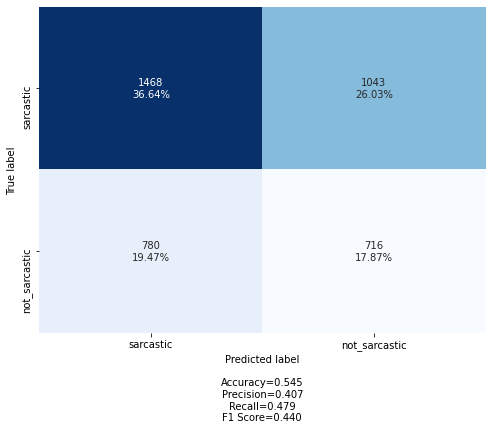

time: 5.62 s (started: 2021-08-08 20:15:38 +00:00)


In [ ]:
y_pred = opt_df.predict(test_x_vectorized_list)
cf_matrix = confusion_matrix(y_pred, test_y)
labels = ['sarcastic','not_sarcastic']
cf_matrix
make_confusion_matrix(cf_matrix,categories=labels, figsize=(8,6), cbar=False)

In [ ]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

probs = opt_df.predict_proba(test_x_vectorized_list)
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(test_y, probs[:,i], pos_label=i)
    
random_probs = [0 for i in range(len(test_y))]
p_fpr, p_tpr, _ = roc_curve(test_y, random_probs, pos_label=1)

time: 5.35 s (started: 2021-08-08 20:15:43 +00:00)


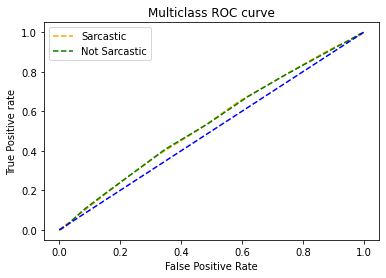

time: 194 ms (started: 2021-08-08 20:15:49 +00:00)


In [ ]:
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Sarcastic')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Not Sarcastic')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
# plt.savefig('Multiclass ROC',dpi=300)

## Glove

In [14]:
def convert_sentence_embeddings(data,model):
    vocab=[w for w in data if w in model.wv.vocab]
    avg_pool=np.mean(model[vocab],axis=0)
#     sum_pool=np.sum(model[vocab],axis=0)
#     min_pool=np.min(model[vocab],axis=0)
#     max_pool=np.max(model[vocab],axis=0)
    return avg_pool

time: 4.5 ms (started: 2021-08-16 10:51:06 +00:00)


In [15]:
# Glove Vectors to word2vec format for mean pooling
glove_file='Embeddings/glove.6B.50d.txt'
word2vec_output_file = 'Embeddings/Sarcasm/glove.6B.50d_project2.txt.word2vec'
glove_loaded=glove2word2vec(glove_file, word2vec_output_file)
glove_loaded = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)
print(glove_loaded)

time: 31.4 s (started: 2021-08-16 10:51:07 +00:00)


In [16]:
# Glove Vectors
print('Glove Vectors')
train_glove_x=train_x.apply(lambda z: convert_sentence_embeddings(z,glove_loaded) )
train_glove_y=train_y
# train_glove_x.shape,train_glove_y.shape
train_glove_x=list(train_glove_x)

Glove Vectors


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



time: 5.37 s (started: 2021-08-16 10:51:38 +00:00)


In [17]:
test_glove_x=test_x.apply(lambda z: convert_sentence_embeddings(z,glove_loaded) )
test_glove_y=test_y
# test_glove_x.shape,test_glove_y.shape
test_glove_x=list(test_glove_x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



time: 967 ms (started: 2021-08-16 10:51:44 +00:00)


### Logistic Regression

In [18]:
txt_best_grids = "grid_results/logistic_regression/best_results_lr_glove_v1.txt" # name of the txt file with all best results of all runned grid searches
grid_results_name = 'grid_results/logistic_regression/grid_results_lr_glove_v1.csv' # name of the csv file with all tests of the current grid search

time: 2.01 ms (started: 2021-08-16 10:51:44 +00:00)


In [19]:
param_grid = {'penalty': ['none','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

lr = LogisticRegression(max_iter=10000)

grid = GridSearchCV(lr, param_grid, cv=StratifiedKFold(3), scoring='accuracy', verbose=1, n_jobs=-1, return_train_score=True)
grid_result = grid.fit(train_glove_x, train_glove_y)


opt_df = grid_result.best_estimator_
print("{}".format(grid_result.best_params_))
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = test_glove_y, grid.predict(test_glove_x)
print(classification_report(y_true, y_pred))
print()

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'C': 0.001, 'penalty': 'l2'}
Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.56      1.00      0.72      2248
           1       0.00      0.00      0.00      1759

    accuracy                           0.56      4007
   macro avg       0.28      0.50      0.36      4007
weighted avg       0.31      0.56      0.40      4007


time: 2min 28s (started: 2021-08-16 10:51:45 +00:00)


[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:  2.5min finished
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [20]:
lr.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

time: 8.78 ms (started: 2021-08-16 10:54:13 +00:00)


In [ ]:
# txt file with all best results of all runned grid searches
import json

grid_results_name_str = f'Results wrt: {grid_results_name} \n'
grid_params_str = f'Grid on: {json.dumps(grid_result.param_grid)} \n' 
grid_results_str = f'Best: {grid_result.best_score_} using {grid_result.best_params_} \n'

with open(txt_best_grids, "a") as file_object:
    file_object.write(grid_results_name_str)
    file_object.write(grid_params_str)
    file_object.write(grid_results_str)
    file_object.write('\n')

time: 33.8 ms (started: 2021-08-08 20:18:28 +00:00)


In [ ]:
print(grid_results_str)

Best: 0.5610518899382569 using {'C': 0.001, 'penalty': 'l2'} 

time: 1.02 ms (started: 2021-08-08 20:18:28 +00:00)


In [ ]:
grid.cv_results_

{'mean_fit_time': array([6.42984088, 0.12582604, 6.58511464, 0.30928405, 6.63307961,
        0.66848667, 6.95788646, 1.5991834 , 6.88638401, 3.36657437,
        7.03392259, 3.70274091, 6.94029991, 3.43072677]),
 'mean_score_time': array([0.00885018, 0.01058563, 0.01334961, 0.00858378, 0.00881966,
        0.01152968, 0.01099491, 0.00853682, 0.01607196, 0.01663939,
        0.01099062, 0.01629368, 0.01253454, 0.00801722]),
 'mean_test_score': array([0.55893746, 0.56105189, 0.55893746, 0.55884937, 0.55893746,
        0.55836489, 0.55893746, 0.55876128, 0.55893746, 0.55924571,
        0.55893746, 0.55942198, 0.55893746, 0.55889344]),
 'mean_train_score': array([0.56261559, 0.56105189, 0.56261559, 0.55900363, 0.56261559,
        0.56006077, 0.56261559, 0.56166855, 0.56261559, 0.56186676,
        0.56261559, 0.56239535, 0.56261559, 0.56283584]),
 'param_C': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10, 100,
                    100, 1000, 1000],
              mask=[False

time: 17.6 ms (started: 2021-08-08 20:18:29 +00:00)


In [ ]:
# csv file with all tests of the current grid search

df = pd.DataFrame(grid.cv_results_)[['param_penalty', 'param_C',
                                     'mean_test_score', 'std_test_score', 
                                     'mean_train_score', 'std_train_score',
                                     'rank_test_score', 'mean_fit_time']].sort_values(by='rank_test_score')
df.rename(columns={'param_penalty': 'penalty',
                   'param_C': 'C',
                   'mean_test_score': 'mean_val_score',
                   'std_test_score':'std_val_score',
                   'rank_test_score': 'rank_val_score'}, inplace=True)
df.mean_train_score *= -1
df.mean_val_score *= -1
df

,penalty,C,mean_val_score,std_val_score,mean_train_score,std_train_score,rank_val_score,mean_fit_time
1,l2,0.001,-0.561052,0.000054,-0.561052,0.000027,1,0.125826
11,l2,100,-0.559422,0.001522,-0.562395,0.001334,2,3.702741
9,l2,10,-0.559246,0.002770,-0.561867,0.001214,3,3.366574
0,none,0.001,-0.558937,0.001211,-0.562616,0.001362,4,6.429841
2,none,0.01,-0.558937,0.001211,-0.562616,0.001362,4,6.585115
4,none,0.1,-0.558937,0.001211,-0.562616,0.001362,4,6.633080
6,none,1,-0.558937,0.001211,-0.562616,0.001362,4,6.957886
8,none,10,-0.558937,0.001211,-0.562616,0.001362,4,6.886384
10,none,100,-0.558937,0.001211,-0.562616,0.001362,4,7.033923
12,none,1000,-0.558937,0.001211,-0.562616,0.001362,4,6.940300


time: 35.3 ms (started: 2021-08-08 20:18:29 +00:00)


In [ ]:
df.to_csv(grid_results_name)

time: 9.75 ms (started: 2021-08-08 20:18:29 +00:00)


In [ ]:
result = opt_df.score(test_glove_x, test_glove_y)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 56.10%
time: 16.4 ms (started: 2021-08-08 20:18:29 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: RuntimeWarning:

invalid value encountered in long_scalars



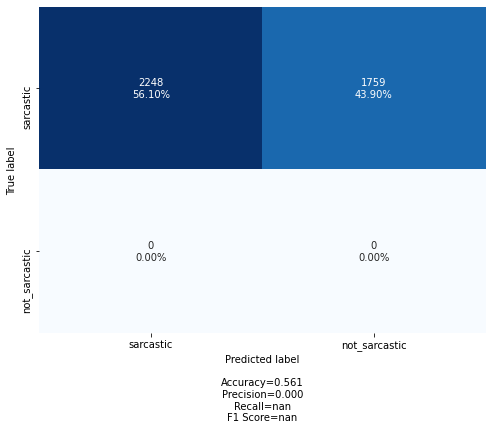

time: 170 ms (started: 2021-08-08 20:18:29 +00:00)


In [ ]:
y_pred = opt_df.predict(test_glove_x)
cf_matrix = confusion_matrix(y_pred, test_glove_y)
labels = ['sarcastic','not_sarcastic']
cf_matrix
make_confusion_matrix(cf_matrix,categories=labels, figsize=(8,6), cbar=False)

In [ ]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

probs = opt_df.predict_proba(test_glove_x)
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(test_glove_y, probs[:,i], pos_label=i)
    
random_probs = [0 for i in range(len(test_glove_y))]
p_fpr, p_tpr, _ = roc_curve(test_glove_y, random_probs, pos_label=1)

time: 18.9 ms (started: 2021-08-08 20:18:29 +00:00)


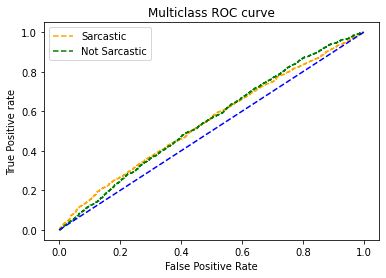

time: 247 ms (started: 2021-08-08 20:18:29 +00:00)


In [ ]:
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Sarcastic')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Not Sarcastic')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
# plt.savefig('Multiclass ROC',dpi=300)

### KNN

In [ ]:
txt_best_grids = "grid_results/knn/best_results_knn_glove_v1.txt" # name of the txt file with all best results of all runned grid searches
grid_results_name = 'grid_results/knn/grid_results_knn_glove_v1.csv' # name of the csv file with all tests of the current grid search

time: 2.17 ms (started: 2021-08-08 20:18:29 +00:00)


In [ ]:
param_grid = {'n_neighbors': list(range(1, 31, 3)),
              'weights': ['uniform', 'distance'],
             }

knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv=StratifiedKFold(3), scoring='accuracy', verbose=1, n_jobs=-1, return_train_score=True)
grid_result = grid.fit(train_glove_x, train_glove_y)


opt_df = grid_result.best_estimator_
print("{}".format(grid_result.best_params_))
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = test_y, grid.predict(test_glove_x)
print(classification_report(y_true, y_pred))
print()

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 24.8min finished


{'n_neighbors': 28, 'weights': 'uniform'}
Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.60      0.61      0.61      2248
           1       0.49      0.48      0.48      1759

    accuracy                           0.55      4007
   macro avg       0.55      0.54      0.54      4007
weighted avg       0.55      0.55      0.55      4007


time: 25min (started: 2021-08-08 20:18:29 +00:00)


In [ ]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

time: 5.13 ms (started: 2021-08-08 20:43:29 +00:00)


In [ ]:
# txt file with all best results of all runned grid searches
import json

grid_results_name_str = f'Results wrt: {grid_results_name} \n'
grid_params_str = f'Grid on: {json.dumps(grid_result.param_grid)} \n' 
grid_results_str = f'Best: {grid_result.best_score_} using {grid_result.best_params_} \n'

with open(txt_best_grids, "a") as file_object:
    file_object.write(grid_results_name_str)
    file_object.write(grid_params_str)
    file_object.write(grid_results_str)
    file_object.write('\n')

time: 11.1 ms (started: 2021-08-08 20:43:29 +00:00)


In [ ]:
print(grid_results_str)

Best: 0.5563827016589317 using {'n_neighbors': 28, 'weights': 'uniform'} 

time: 1.41 ms (started: 2021-08-08 20:43:29 +00:00)


In [ ]:
grid.cv_results_

{'mean_fit_time': array([0.17705512, 0.22158766, 0.21518421, 0.21078102, 0.22046614,
        0.22691933, 0.22132754, 0.22813805, 0.22561828, 0.25612386,
        0.18212811, 0.20715515, 0.19850675, 0.21180153, 0.22209875,
        0.21056143, 0.2401526 , 0.18729734, 0.1853439 , 0.19222792]),
 'mean_score_time': array([15.14902107, 14.76426546, 17.03405992, 16.74127618, 17.47753541,
        17.22439464, 17.82808876, 17.4612569 , 17.7649351 , 17.66690644,
        17.88583771, 17.79715474, 17.92788688, 17.87174145, 18.28360693,
        18.4556253 , 18.4583292 , 18.67398763, 18.50364391, 16.69986486]),
 'mean_test_score': array([0.52841186, 0.52841186, 0.54885012, 0.53281638, 0.53581174,
        0.53766182, 0.54955489, 0.54338798, 0.54352039, 0.54537045,
        0.55241805, 0.54898242, 0.54863   , 0.55074437, 0.5559422 ,
        0.55149339, 0.55250637, 0.55488503, 0.5563827 , 0.55510535]),
 'mean_train_score': array([1.        , 1.        , 0.71973836, 1.        , 0.67430179,
        1.     

time: 16.3 ms (started: 2021-08-08 20:43:29 +00:00)


In [ ]:
# csv file with all tests of the current grid search

df = pd.DataFrame(grid.cv_results_)[['param_n_neighbors', 'param_weights',
                                     'mean_test_score', 'std_test_score', 
                                     'mean_train_score', 'std_train_score',
                                     'rank_test_score', 'mean_fit_time']].sort_values(by='rank_test_score')
df.rename(columns={'param_n_neighbors': 'n_neighbors',
                   'param_weights': 'weights',
                   'mean_test_score': 'mean_val_score',
                   'std_test_score':'std_val_score',
                   'rank_test_score': 'rank_val_score'}, inplace=True)
df.mean_train_score *= -1
df.mean_val_score *= -1
df

,n_neighbors,weights,mean_val_score,std_val_score,mean_train_score,std_train_score,rank_val_score,mean_fit_time
18,28,uniform,-0.556383,0.002968,-0.618602,0.001559,1,0.185344
14,22,uniform,-0.555942,0.000919,-0.625341,0.000453,2,0.222099
19,28,distance,-0.555105,0.003073,-1.000000,0.000000,3,0.192228
17,25,distance,-0.554885,0.000864,-1.000000,0.000000,4,0.187297
16,25,uniform,-0.552506,0.000828,-0.615651,0.001558,5,0.240153
10,16,uniform,-0.552418,0.003779,-0.635759,0.002303,6,0.182128
15,22,distance,-0.551493,0.002039,-1.000000,0.000000,7,0.210561
13,19,distance,-0.550744,0.001551,-1.000000,0.000000,8,0.211802
6,10,uniform,-0.549555,0.004253,-0.659457,0.004561,9,0.221328
11,16,distance,-0.548982,0.001698,-1.000000,0.000000,10,0.207155


time: 35 ms (started: 2021-08-08 20:43:29 +00:00)


In [ ]:
df.to_csv(grid_results_name)

time: 7.25 ms (started: 2021-08-08 20:43:29 +00:00)


In [ ]:
result = opt_df.score(test_glove_x, test_glove_y)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 55.33%
time: 10.2 s (started: 2021-08-08 20:43:29 +00:00)


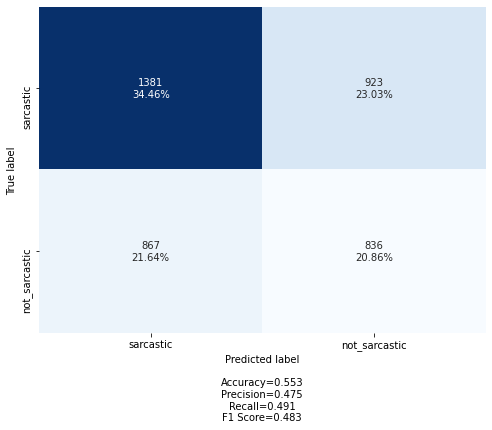

time: 10.3 s (started: 2021-08-08 20:43:40 +00:00)


In [ ]:
y_pred = opt_df.predict(test_glove_x)
cf_matrix = confusion_matrix(y_pred, test_glove_y)
labels = ['sarcastic','not_sarcastic']
cf_matrix
make_confusion_matrix(cf_matrix,categories=labels, figsize=(8,6), cbar=False)

In [ ]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

probs = opt_df.predict_proba(test_glove_x)
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(test_glove_y, probs[:,i], pos_label=i)
    
random_probs = [0 for i in range(len(test_glove_y))]
p_fpr, p_tpr, _ = roc_curve(test_glove_y, random_probs, pos_label=1)

time: 10.1 s (started: 2021-08-08 20:43:50 +00:00)


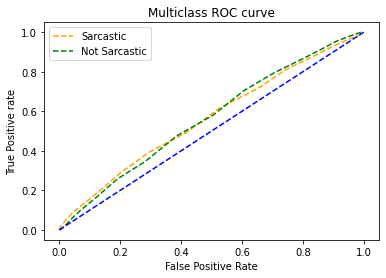

time: 200 ms (started: 2021-08-08 20:44:00 +00:00)


In [ ]:
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Sarcastic')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Not Sarcastic')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
# plt.savefig('Multiclass ROC',dpi=300)

## Fasttext

In [23]:
def convert_sentence_embeddings(data,model):
    vocab=[w for w in data if w in model.wv.vocab]
    avg_pool=np.mean(model[vocab],axis=0)
#     sum_pool=np.sum(model[vocab],axis=0)
#     min_pool=np.min(model[vocab],axis=0)
#     max_pool=np.max(model[vocab],axis=0)
    return avg_pool

time: 3.01 ms (started: 2021-08-16 10:57:12 +00:00)


In [24]:
# Fasttext to word2vec format for mean pooling
fasttext_file="Embeddings/crawl-300d-2M.vec"
fasttext_model = KeyedVectors.load_word2vec_format(fasttext_file, binary=False)
print(fasttext_model)

time: 10min 10s (started: 2021-08-16 10:57:13 +00:00)


In [25]:
# Fasttext Vectors
print('Fasttext Vectors')
train_fasttext_x=train_x.apply(lambda z: convert_sentence_embeddings(z,fasttext_model) )
train_fasttext_y=train_y
# train_fasttext_x.shape,train_fasttext_y.shape
train_fasttext_x=list(train_fasttext_x)

Fasttext Vectors


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



time: 5.45 s (started: 2021-08-16 11:07:23 +00:00)


In [26]:
test_fasttext_x=test_x.apply(lambda z: convert_sentence_embeddings(z,fasttext_model) )
test_fasttext_y=test_y
# test_fasttext_x.shape,test_fasttext_y.shape
test_fasttext_x=list(test_fasttext_x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



time: 983 ms (started: 2021-08-16 11:07:29 +00:00)


### Logistic Regression

In [27]:
txt_best_grids = "grid_results/logistic_regression/best_results_lr_fasttext_v1.txt" # name of the txt file with all best results of all runned grid searches
grid_results_name = 'grid_results/logistic_regression/grid_results_lr_fasttext_v1.csv' # name of the csv file with all tests of the current grid search

time: 2.35 ms (started: 2021-08-16 11:07:30 +00:00)


In [28]:
param_grid = {'penalty': ['none','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

lr = LogisticRegression(max_iter=10000)

grid = GridSearchCV(lr, param_grid, cv=StratifiedKFold(3), scoring='accuracy', verbose=1, n_jobs=-1, return_train_score=True)
grid_result = grid.fit(train_fasttext_x, train_fasttext_y)


opt_df = grid_result.best_estimator_
print("{}".format(grid_result.best_params_))
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = test_fasttext_y, grid.predict(test_fasttext_x)
print(classification_report(y_true, y_pred))
print()

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:  5.5min finished


{'C': 0.001, 'penalty': 'l2'}
Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.56      1.00      0.72      2248
           1       0.00      0.00      0.00      1759

    accuracy                           0.56      4007
   macro avg       0.28      0.50      0.36      4007
weighted avg       0.31      0.56      0.40      4007


time: 5min 27s (started: 2021-08-16 11:07:30 +00:00)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [29]:
lr.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

time: 4.85 ms (started: 2021-08-16 11:12:58 +00:00)


In [30]:
# txt file with all best results of all runned grid searches
import json

grid_results_name_str = f'Results wrt: {grid_results_name} \n'
grid_params_str = f'Grid on: {json.dumps(grid_result.param_grid)} \n' 
grid_results_str = f'Best: {grid_result.best_score_} using {grid_result.best_params_} \n'

with open(txt_best_grids, "a") as file_object:
    file_object.write(grid_results_name_str)
    file_object.write(grid_params_str)
    file_object.write(grid_results_str)
    file_object.write('\n')

time: 335 ms (started: 2021-08-16 11:12:58 +00:00)


In [31]:
print(grid_results_str)

Best: 0.5610518899382569 using {'C': 0.001, 'penalty': 'l2'} 

time: 1.39 ms (started: 2021-08-16 11:12:58 +00:00)


In [32]:
grid.cv_results_

{'mean_fit_time': array([22.90610663,  0.5212152 , 24.93313511,  0.69297123, 25.71078793,
         1.90305201, 22.83616384,  3.97471889, 22.87053204,  5.98620288,
        21.40327247,  8.13535698, 21.63500007, 17.57900349]),
 'mean_score_time': array([0.02321267, 0.0312012 , 0.02385434, 0.04294419, 0.02574857,
        0.02912807, 0.02990254, 0.02339514, 0.02478091, 0.02922765,
        0.02996691, 0.02421967, 0.02368855, 0.02169983]),
 'mean_test_score': array([0.5591577 , 0.56105189, 0.5591577 , 0.56025903, 0.5591577 ,
        0.55757198, 0.5591577 , 0.55867305, 0.5591577 , 0.55876122,
        0.5591577 , 0.55862911, 0.5591577 , 0.55902556]),
 'mean_train_score': array([0.56265964, 0.56105189, 0.56265964, 0.56019294, 0.56265964,
        0.56010485, 0.56265964, 0.56094173, 0.56265964, 0.56224117,
        0.56265964, 0.56241737, 0.56265964, 0.56254952]),
 'param_C': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10, 100,
                    100, 1000, 1000],
           

time: 16.2 ms (started: 2021-08-16 11:12:58 +00:00)


In [33]:
# csv file with all tests of the current grid search

df = pd.DataFrame(grid.cv_results_)[['param_penalty', 'param_C',
                                     'mean_test_score', 'std_test_score', 
                                     'mean_train_score', 'std_train_score',
                                     'rank_test_score', 'mean_fit_time']].sort_values(by='rank_test_score')
df.rename(columns={'param_penalty': 'penalty',
                   'param_C': 'C',
                   'mean_test_score': 'mean_val_score',
                   'std_test_score':'std_val_score',
                   'rank_test_score': 'rank_val_score'}, inplace=True)
df.mean_train_score *= -1
df.mean_val_score *= -1
df

,penalty,C,mean_val_score,std_val_score,mean_train_score,std_train_score,rank_val_score,mean_fit_time
1,l2,0.001,-0.561052,0.000054,-0.561052,0.000027,1,0.521215
3,l2,0.01,-0.560259,0.000284,-0.560193,0.000319,2,0.692971
0,none,0.001,-0.559158,0.001340,-0.562660,0.001257,3,22.906107
2,none,0.01,-0.559158,0.001340,-0.562660,0.001257,3,24.933135
4,none,0.1,-0.559158,0.001340,-0.562660,0.001257,3,25.710788
6,none,1,-0.559158,0.001340,-0.562660,0.001257,3,22.836164
8,none,10,-0.559158,0.001340,-0.562660,0.001257,3,22.870532
10,none,100,-0.559158,0.001340,-0.562660,0.001257,3,21.403272
12,none,1000,-0.559158,0.001340,-0.562660,0.001257,3,21.635000
13,l2,1000,-0.559026,0.001149,-0.562550,0.001292,10,17.579003


time: 101 ms (started: 2021-08-16 11:12:58 +00:00)


In [34]:
df.to_csv(grid_results_name)

time: 13.5 ms (started: 2021-08-16 11:12:58 +00:00)


In [35]:
result = opt_df.score(test_fasttext_x, test_fasttext_y)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 56.10%
time: 20.1 ms (started: 2021-08-16 11:12:58 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: RuntimeWarning:

invalid value encountered in long_scalars



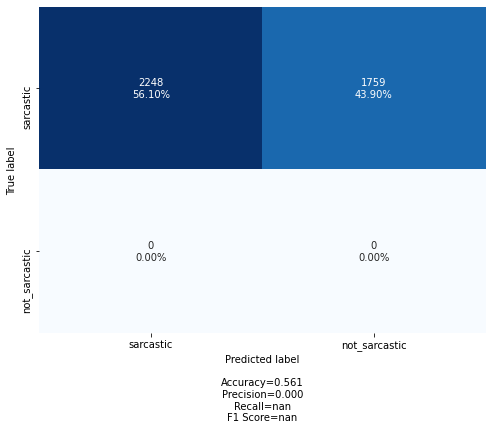

time: 235 ms (started: 2021-08-16 11:12:58 +00:00)


In [36]:
y_pred = opt_df.predict(test_fasttext_x)
cf_matrix = confusion_matrix(y_pred, test_fasttext_y)
labels = ['sarcastic','not_sarcastic']
cf_matrix
make_confusion_matrix(cf_matrix,categories=labels, figsize=(8,6), cbar=False)

In [37]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

probs = opt_df.predict_proba(test_fasttext_x)
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(test_fasttext_y, probs[:,i], pos_label=i)
    
random_probs = [0 for i in range(len(test_fasttext_y))]
p_fpr, p_tpr, _ = roc_curve(test_fasttext_y, random_probs, pos_label=1)

time: 30.2 ms (started: 2021-08-16 11:12:58 +00:00)


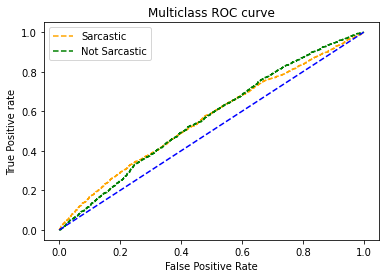

time: 284 ms (started: 2021-08-16 11:12:59 +00:00)


In [38]:
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Sarcastic')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Not Sarcastic')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
# plt.savefig('Multiclass ROC',dpi=300)

### KNN

In [ ]:
txt_best_grids = "grid_results/knn/best_results_knn_fasttext_v1.txt" # name of the txt file with all best results of all runned grid searches
grid_results_name = 'grid_results/knn/grid_results_knn_fasttext_v1.csv' # name of the csv file with all tests of the current grid search

time: 2.48 ms (started: 2021-08-09 07:53:53 +00:00)


In [ ]:
param_grid = {'n_neighbors': list(range(1, 31, 3)),
              'weights': ['uniform', 'distance'],
             }

knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv=StratifiedKFold(3), scoring='accuracy', verbose=1, n_jobs=-1, return_train_score=True)
grid_result = grid.fit(train_fasttext_x, train_fasttext_y)


opt_df = grid_result.best_estimator_
print("{}".format(grid_result.best_params_))
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = test_y, grid.predict(test_fasttext_x)
print(classification_report(y_true, y_pred))
print()

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 113.3min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 150.7min finished


{'n_neighbors': 28, 'weights': 'uniform'}
Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.61      0.58      0.59      2248
           1       0.49      0.52      0.50      1759

    accuracy                           0.55      4007
   macro avg       0.55      0.55      0.55      4007
weighted avg       0.56      0.55      0.55      4007


time: 2h 32min 1s (started: 2021-08-09 07:53:53 +00:00)


In [ ]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

time: 3.92 ms (started: 2021-08-09 10:25:54 +00:00)


In [ ]:
# txt file with all best results of all runned grid searches
import json

grid_results_name_str = f'Results wrt: {grid_results_name} \n'
grid_params_str = f'Grid on: {json.dumps(grid_result.param_grid)} \n' 
grid_results_str = f'Best: {grid_result.best_score_} using {grid_result.best_params_} \n'

with open(txt_best_grids, "a") as file_object:
    file_object.write(grid_results_name_str)
    file_object.write(grid_params_str)
    file_object.write(grid_results_str)
    file_object.write('\n')

time: 275 ms (started: 2021-08-09 10:25:54 +00:00)


In [ ]:
print(grid_results_str)

Best: 0.5555457574071906 using {'n_neighbors': 28, 'weights': 'uniform'} 

time: 778 µs (started: 2021-08-09 10:25:54 +00:00)


In [ ]:
grid.cv_results_

{'mean_fit_time': array([1.40291842, 1.62339362, 1.42131996, 1.27933828, 1.37807679,
        1.35412232, 1.29152862, 1.33145912, 1.39457901, 1.37351807,
        1.35295582, 1.33363573, 1.29123076, 1.32348323, 1.36465518,
        1.27100976, 1.28144201, 1.33721821, 1.29762999, 1.0830578 ]),
 'mean_score_time': array([106.21298997, 108.401896  , 109.69161868, 106.64699713,
        109.43532316, 107.33160043, 107.9737517 , 107.068724  ,
        108.06090244, 107.20718209, 107.30991117, 106.76883125,
        107.25071128, 105.93963846, 106.37087838, 106.5020558 ,
        107.10174402, 106.78347651, 107.66745543, 106.71920554]),
 'mean_test_score': array([0.52708978, 0.52708978, 0.55343132, 0.53854271, 0.53876286,
        0.54021648, 0.5507443 , 0.54122963, 0.54180257, 0.54413713,
        0.5531231 , 0.54497384, 0.54625155, 0.54849801, 0.55202202,
        0.54779296, 0.54920265, 0.55188961, 0.55554576, 0.55347541]),
 'mean_train_score': array([1.        , 1.        , 0.73017801, 1.        ,

time: 14.8 ms (started: 2021-08-09 10:25:54 +00:00)


In [ ]:
# csv file with all tests of the current grid search

df = pd.DataFrame(grid.cv_results_)[['param_n_neighbors', 'param_weights',
                                     'mean_test_score', 'std_test_score', 
                                     'mean_train_score', 'std_train_score',
                                     'rank_test_score', 'mean_fit_time']].sort_values(by='rank_test_score')
df.rename(columns={'param_n_neighbors': 'n_neighbors',
                   'param_weights': 'weights',
                   'mean_test_score': 'mean_val_score',
                   'std_test_score':'std_val_score',
                   'rank_test_score': 'rank_val_score'}, inplace=True)
df.mean_train_score *= -1
df.mean_val_score *= -1
df

,n_neighbors,weights,mean_val_score,std_val_score,mean_train_score,std_train_score,rank_val_score,mean_fit_time
18,28,uniform,-0.555546,0.004211,-0.616510,0.002480,1,1.297630
19,28,distance,-0.553475,0.005518,-1.000000,0.000000,2,1.083058
2,4,uniform,-0.553431,0.003350,-0.730178,0.001927,3,1.421320
10,16,uniform,-0.553123,0.006647,-0.639922,0.003217,4,1.352956
14,22,uniform,-0.552022,0.006170,-0.626509,0.002983,5,1.364655
17,25,distance,-0.551890,0.004291,-1.000000,0.000000,6,1.337218
6,10,uniform,-0.550744,0.005421,-0.662012,0.001509,7,1.291529
16,25,uniform,-0.549203,0.004138,-0.613206,0.003313,8,1.281442
13,19,distance,-0.548498,0.004797,-1.000000,0.000000,9,1.323483
15,22,distance,-0.547793,0.005902,-1.000000,0.000000,10,1.271010


time: 77.2 ms (started: 2021-08-09 10:25:54 +00:00)


In [ ]:
df.to_csv(grid_results_name)

time: 18.8 ms (started: 2021-08-09 10:25:54 +00:00)


In [ ]:
result = opt_df.score(test_fasttext_x, test_fasttext_y)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 55.30%
time: 1min 14s (started: 2021-08-09 10:25:54 +00:00)


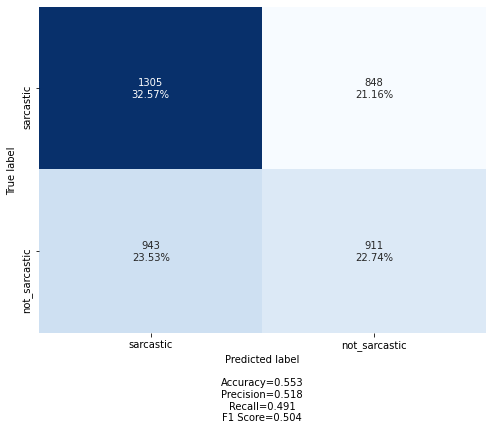

time: 1min 14s (started: 2021-08-09 10:27:09 +00:00)


In [ ]:
y_pred = opt_df.predict(test_fasttext_x)
cf_matrix = confusion_matrix(y_pred, test_fasttext_y)
labels = ['sarcastic','not_sarcastic']
cf_matrix
make_confusion_matrix(cf_matrix,categories=labels, figsize=(8,6), cbar=False)

In [ ]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

probs = opt_df.predict_proba(test_fasttext_x)
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(test_fasttext_y, probs[:,i], pos_label=i)
    
random_probs = [0 for i in range(len(test_fasttext_y))]
p_fpr, p_tpr, _ = roc_curve(test_fasttext_y, random_probs, pos_label=1)

time: 1min 15s (started: 2021-08-09 10:28:24 +00:00)


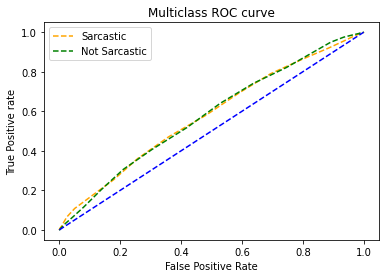

time: 201 ms (started: 2021-08-09 10:29:39 +00:00)


In [ ]:
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Sarcastic')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Not Sarcastic')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
# plt.savefig('Multiclass ROC',dpi=300)

## Google News

In [ ]:
def convert_sentence_embeddings(data,model):
    vocab=[w for w in data if w in model.wv.vocab]
    avg_pool=np.mean(model[vocab],axis=0)
#     sum_pool=np.sum(model[vocab],axis=0)
#     min_pool=np.min(model[vocab],axis=0)
#     max_pool=np.max(model[vocab],axis=0)
    return avg_pool

time: 5.02 ms (started: 2021-08-09 10:29:39 +00:00)


In [ ]:
# Google News Vectors to word2vec format for mean pooling
google_news_embed='Embeddings/GoogleNews-vectors-negative300.bin'
google_loaded_model=KeyedVectors.load_word2vec_format(google_news_embed,binary=True)
print(google_loaded_model)

time: 1min 23s (started: 2021-08-09 10:29:39 +00:00)


In [ ]:
# Google vectors
print('Google Vectors')
train_google_x=train_x.apply(lambda z: convert_sentence_embeddings(z,google_loaded_model) )
train_google_y=train_y
# train_google_x.shape,train_google_y.shape
train_google_x=list(train_google_x)

Google Vectors


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



time: 5.27 s (started: 2021-08-09 10:31:03 +00:00)


In [ ]:
test_google_x=test_x.apply(lambda z: convert_sentence_embeddings(z,google_loaded_model) )
test_google_y=test_y
# test_google_x.shape,test_google_y.shape
test_google_x=list(test_google_x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



time: 927 ms (started: 2021-08-09 10:31:08 +00:00)


### Logistic Regression

In [ ]:
txt_best_grids = "grid_results/logistic_regression/best_results_lr_google_v1.txt" # name of the txt file with all best results of all runned grid searches
grid_results_name = 'grid_results/logistic_regression/grid_results_lr_google_v1.csv' # name of the csv file with all tests of the current grid search

time: 1.09 ms (started: 2021-08-09 10:31:09 +00:00)


In [ ]:
param_grid = {'penalty': ['none','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

lr = LogisticRegression(max_iter=10000)

grid = GridSearchCV(lr, param_grid, cv=StratifiedKFold(3), scoring='accuracy', verbose=1, n_jobs=-1, return_train_score=True)
grid_result = grid.fit(train_google_x, train_google_y)


opt_df = grid_result.best_estimator_
print("{}".format(grid_result.best_params_))
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = test_google_y, grid.predict(test_google_x)
print(classification_report(y_true, y_pred))
print()

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:  4.2min finished


{'C': 0.001, 'penalty': 'l2'}
Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.56      1.00      0.72      2248
           1       0.00      0.00      0.00      1759

    accuracy                           0.56      4007
   macro avg       0.28      0.50      0.36      4007
weighted avg       0.31      0.56      0.40      4007


time: 4min 13s (started: 2021-08-09 10:31:09 +00:00)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
lr.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

time: 8.66 ms (started: 2021-08-09 10:35:23 +00:00)


In [ ]:
# txt file with all best results of all runned grid searches
import json

grid_results_name_str = f'Results wrt: {grid_results_name} \n'
grid_params_str = f'Grid on: {json.dumps(grid_result.param_grid)} \n' 
grid_results_str = f'Best: {grid_result.best_score_} using {grid_result.best_params_} \n'

with open(txt_best_grids, "a") as file_object:
    file_object.write(grid_results_name_str)
    file_object.write(grid_params_str)
    file_object.write(grid_results_str)
    file_object.write('\n')

time: 254 ms (started: 2021-08-09 10:35:23 +00:00)


In [ ]:
print(grid_results_str)

Best: 0.5610518899382569 using {'C': 0.001, 'penalty': 'l2'} 

time: 1.28 ms (started: 2021-08-09 10:35:23 +00:00)


In [ ]:
grid.cv_results_

{'mean_fit_time': array([17.61151775,  0.32392279, 17.76666729,  0.67287906, 17.99582426,
         1.29330651, 18.34686764,  2.01323994, 18.22521599,  3.82190537,
        18.33545685,  5.98504194, 18.36589464, 11.11782972]),
 'mean_score_time': array([0.02131788, 0.02635868, 0.0201571 , 0.03038152, 0.02170189,
        0.02409426, 0.02112714, 0.03362465, 0.02174958, 0.0207262 ,
        0.02153699, 0.02132408, 0.02791834, 0.01916623]),
 'mean_test_score': array([0.5592458 , 0.56105189, 0.5592458 , 0.5608757 , 0.5592458 ,
        0.5556779 , 0.5592458 , 0.55871716, 0.5592458 , 0.55902555,
        0.5592458 , 0.55920176, 0.5592458 , 0.55858507]),
 'mean_train_score': array([0.56213105, 0.56105189, 0.56213105, 0.56085367, 0.56213105,
        0.5586292 , 0.56213105, 0.56052324, 0.56213105, 0.56149233,
        0.56213105, 0.56197688, 0.56213105, 0.56215307]),
 'param_C': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10, 100,
                    100, 1000, 1000],
           

time: 14.8 ms (started: 2021-08-09 10:35:23 +00:00)


In [ ]:
# csv file with all tests of the current grid search

df = pd.DataFrame(grid.cv_results_)[['param_penalty', 'param_C',
                                     'mean_test_score', 'std_test_score', 
                                     'mean_train_score', 'std_train_score',
                                     'rank_test_score', 'mean_fit_time']].sort_values(by='rank_test_score')
df.rename(columns={'param_penalty': 'penalty',
                   'param_C': 'C',
                   'mean_test_score': 'mean_val_score',
                   'std_test_score':'std_val_score',
                   'rank_test_score': 'rank_val_score'}, inplace=True)
df.mean_train_score *= -1
df.mean_val_score *= -1
df

,penalty,C,mean_val_score,std_val_score,mean_train_score,std_train_score,rank_val_score,mean_fit_time
1,l2,0.001,-0.561052,0.000054,-0.561052,0.000027,1,0.323923
3,l2,0.01,-0.560876,0.000085,-0.560854,0.000125,2,0.672879
0,none,0.001,-0.559246,0.002322,-0.562131,0.001326,3,17.611518
2,none,0.01,-0.559246,0.002322,-0.562131,0.001326,3,17.766667
4,none,0.1,-0.559246,0.002322,-0.562131,0.001326,3,17.995824
6,none,1,-0.559246,0.002322,-0.562131,0.001326,3,18.346868
8,none,10,-0.559246,0.002322,-0.562131,0.001326,3,18.225216
10,none,100,-0.559246,0.002322,-0.562131,0.001326,3,18.335457
12,none,1000,-0.559246,0.002322,-0.562131,0.001326,3,18.365895
11,l2,100,-0.559202,0.002382,-0.561977,0.001313,10,5.985042


time: 44 ms (started: 2021-08-09 10:35:23 +00:00)


In [ ]:
df.to_csv(grid_results_name)

time: 9.89 ms (started: 2021-08-09 10:35:23 +00:00)


In [ ]:
result = opt_df.score(test_google_x, test_google_y)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 56.10%
time: 22.5 ms (started: 2021-08-09 10:35:23 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: RuntimeWarning:

invalid value encountered in long_scalars



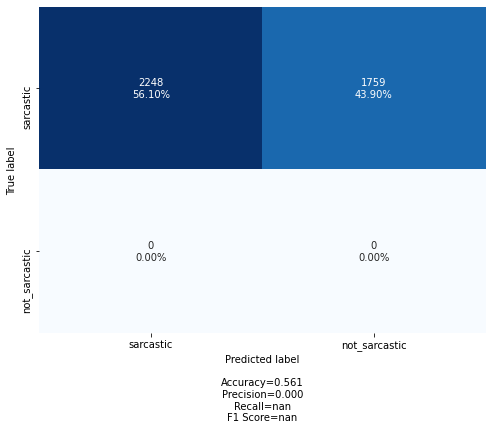

time: 193 ms (started: 2021-08-09 10:35:23 +00:00)


In [ ]:
y_pred = opt_df.predict(test_google_x)
cf_matrix = confusion_matrix(y_pred, test_google_y)
labels = ['sarcastic','not_sarcastic']
cf_matrix
make_confusion_matrix(cf_matrix,categories=labels, figsize=(8,6), cbar=False)

In [ ]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

probs = opt_df.predict_proba(test_google_x)
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(test_google_y, probs[:,i], pos_label=i)
    
random_probs = [0 for i in range(len(test_google_y))]
p_fpr, p_tpr, _ = roc_curve(test_google_y, random_probs, pos_label=1)

time: 23.4 ms (started: 2021-08-09 10:35:23 +00:00)


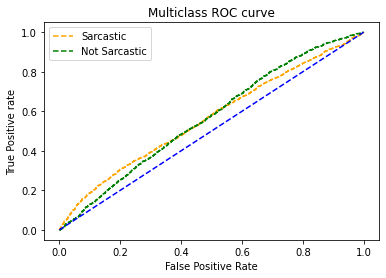

time: 240 ms (started: 2021-08-09 10:35:23 +00:00)


In [ ]:
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Sarcastic')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Not Sarcastic')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
# plt.savefig('Multiclass ROC',dpi=300)

### KNN

In [ ]:
txt_best_grids = "grid_results/knn/best_results_knn_google_v1.txt" # name of the txt file with all best results of all runned grid searches
grid_results_name = 'grid_results/knn/grid_results_knn_google_v1.csv' # name of the csv file with all tests of the current grid search

time: 2.33 ms (started: 2021-08-09 10:35:24 +00:00)


In [ ]:
param_grid = {'n_neighbors': list(range(1, 31, 3)),
              'weights': ['uniform', 'distance'],
             }

knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv=StratifiedKFold(3), scoring='accuracy', verbose=1, n_jobs=-1, return_train_score=True)
grid_result = grid.fit(train_google_x, train_google_y)


opt_df = grid_result.best_estimator_
print("{}".format(grid_result.best_params_))
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = test_y, grid.predict(test_google_x)
print(classification_report(y_true, y_pred))
print()

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 122.7min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 164.3min finished


{'n_neighbors': 22, 'weights': 'uniform'}
Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.61      0.61      0.61      2248
           1       0.50      0.51      0.50      1759

    accuracy                           0.56      4007
   macro avg       0.56      0.56      0.56      4007
weighted avg       0.56      0.56      0.56      4007


time: 2h 45min 37s (started: 2021-08-09 10:35:24 +00:00)


In [ ]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

time: 4.22 ms (started: 2021-08-09 13:21:01 +00:00)


In [ ]:
# txt file with all best results of all runned grid searches
import json

grid_results_name_str = f'Results wrt: {grid_results_name} \n'
grid_params_str = f'Grid on: {json.dumps(grid_result.param_grid)} \n' 
grid_results_str = f'Best: {grid_result.best_score_} using {grid_result.best_params_} \n'

with open(txt_best_grids, "a") as file_object:
    file_object.write(grid_results_name_str)
    file_object.write(grid_params_str)
    file_object.write(grid_results_str)
    file_object.write('\n')

time: 16.5 ms (started: 2021-08-09 13:21:01 +00:00)


In [ ]:
print(grid_results_str)

Best: 0.5551934256931245 using {'n_neighbors': 22, 'weights': 'uniform'} 

time: 2.7 ms (started: 2021-08-09 13:21:01 +00:00)


In [ ]:
grid.cv_results_

{'mean_fit_time': array([1.32430744, 1.399405  , 1.32076724, 1.51091139, 1.40048202,
        1.43671171, 1.48837137, 1.42371996, 1.43934798, 1.49160957,
        1.41392517, 1.53254231, 1.49673812, 1.54029012, 1.46576317,
        1.51691826, 1.51900291, 1.63810436, 1.49575067, 1.40926536]),
 'mean_score_time': array([116.68479427, 109.28668594, 116.49824317, 117.97648493,
        114.99168833, 115.92178106, 114.50038584, 112.07801   ,
        112.17866214, 112.58834434, 111.43739502, 112.81339216,
        115.51731984, 119.40812866, 114.62622666, 114.87338034,
        118.67539048, 127.92102202, 118.35610763, 115.52363507]),
 'mean_test_score': array([0.53070207, 0.53070207, 0.54506216, 0.52999732, 0.53700094,
        0.5386748 , 0.55294665, 0.54233078, 0.5421107 , 0.5440929 ,
        0.55329911, 0.54686806, 0.54523827, 0.54748475, 0.55519343,
        0.55017179, 0.54440146, 0.54647176, 0.55197793, 0.55065651]),
 'mean_train_score': array([1.        , 1.        , 0.72588317, 1.        ,

time: 11.5 ms (started: 2021-08-09 13:21:01 +00:00)


In [ ]:
# csv file with all tests of the current grid search

df = pd.DataFrame(grid.cv_results_)[['param_n_neighbors', 'param_weights',
                                     'mean_test_score', 'std_test_score', 
                                     'mean_train_score', 'std_train_score',
                                     'rank_test_score', 'mean_fit_time']].sort_values(by='rank_test_score')
df.rename(columns={'param_n_neighbors': 'n_neighbors',
                   'param_weights': 'weights',
                   'mean_test_score': 'mean_val_score',
                   'std_test_score':'std_val_score',
                   'rank_test_score': 'rank_val_score'}, inplace=True)
df.mean_train_score *= -1
df.mean_val_score *= -1
df

,n_neighbors,weights,mean_val_score,std_val_score,mean_train_score,std_train_score,rank_val_score,mean_fit_time
14,22,uniform,-0.555193,0.002869,-0.627280,0.002104,1,1.465763
10,16,uniform,-0.553299,0.004311,-0.635825,0.003092,2,1.413925
6,10,uniform,-0.552947,0.003580,-0.660118,0.002645,3,1.488371
18,28,uniform,-0.551978,0.002459,-0.615320,0.002046,4,1.495751
19,28,distance,-0.550657,0.004171,-1.000000,0.000000,5,1.409265
15,22,distance,-0.550172,0.002050,-1.000000,0.000000,6,1.516918
13,19,distance,-0.547485,0.002053,-1.000000,0.000000,7,1.540290
11,16,distance,-0.546868,0.002662,-1.000000,0.000000,8,1.532542
17,25,distance,-0.546472,0.004891,-1.000000,0.000000,9,1.638104
12,19,uniform,-0.545238,0.001988,-0.622809,0.002871,10,1.496738


time: 38.1 ms (started: 2021-08-09 13:21:02 +00:00)


In [ ]:
df.to_csv(grid_results_name)

time: 10.5 ms (started: 2021-08-09 13:21:02 +00:00)


In [ ]:
result = opt_df.score(test_google_x, test_google_y)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 56.20%
time: 1min 17s (started: 2021-08-09 13:21:02 +00:00)


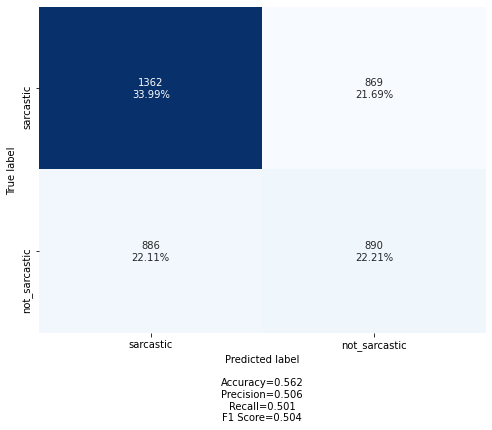

time: 1min 15s (started: 2021-08-09 13:22:20 +00:00)


In [ ]:
y_pred = opt_df.predict(test_google_x)
cf_matrix = confusion_matrix(y_pred, test_google_y)
labels = ['sarcastic','not_sarcastic']
cf_matrix
make_confusion_matrix(cf_matrix,categories=labels, figsize=(8,6), cbar=False)

In [ ]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

probs = opt_df.predict_proba(test_google_x)
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(test_google_y, probs[:,i], pos_label=i)
    
random_probs = [0 for i in range(len(test_google_y))]
p_fpr, p_tpr, _ = roc_curve(test_google_y, random_probs, pos_label=1)

time: 1min 14s (started: 2021-08-09 13:23:35 +00:00)


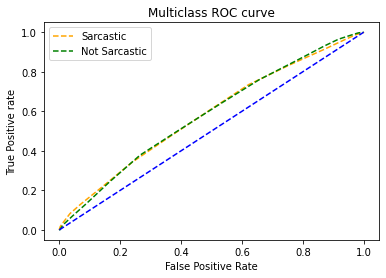

time: 219 ms (started: 2021-08-09 13:24:49 +00:00)


In [ ]:
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Sarcastic')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Not Sarcastic')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
# plt.savefig('Multiclass ROC',dpi=300)